In [341]:
library(readr)
#library(mechkar)
library(dplyr)
library(ggplot2)

In [342]:

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = F)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


In [343]:
df_test = read.csv("../data/test.csv")
df_train = read.csv("../data/train.csv")

In [344]:
head(df_test)
head(df_train)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908


,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


In [345]:
str(df_train)

'data.frame':	365 obs. of  12 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [346]:
vn<- names(df_train)

In [347]:
for (i in vn) {if ((length(unique(df_train[[i]])))<13){
    print(i)
    print(unique(df_train[[i]]))}
}

[1] "season"
[1] 1 2 3 4
[1] "mnth"
 [1]  1  2  3  4  5  6  7  8  9 10 11 12
[1] "holiday"
[1] 0 1
[1] "weekday"
[1] 6 0 1 2 3 4 5
[1] "workingday"
[1] 0 1
[1] "weathersit"
[1] 2 1 3


In [348]:
df_train$season_1 <- ifelse(df_train$season==1,1,0)
df_train$season_2 <- ifelse(df_train$season==2,1,0)
df_train$season_3 <- ifelse(df_train$season==3,1,0)
df_train$season_4 <- ifelse(df_train$season==4,1,0)

In [349]:
df_test$season_1 <- ifelse(df_test$season==1,1,0)
df_test$season_2 <- ifelse(df_test$season==2,1,0)
df_test$season_3 <- ifelse(df_test$season==3,1,0)
df_test$season_4 <- ifelse(df_test$season==4,1,0)

In [350]:
df_train$weekday_1 <- ifelse(df_train$weekday==1,1,0)
df_train$weekday_2 <- ifelse(df_train$weekday==2,1,0)
df_train$weekday_3 <- ifelse(df_train$weekday==3,1,0)
df_train$weekday_4 <- ifelse(df_train$weekday==4,1,0)
df_train$weekday_5 <- ifelse(df_train$weekday==5,1,0)
df_train$weekday_6 <- ifelse(df_train$weekday==6,1,0)
df_train$weekday_0 <- ifelse(df_train$weekday==0,1,0)

In [351]:
df_test$weekday_1 <- ifelse(df_test$weekday==1,1,0)
df_test$weekday_2 <- ifelse(df_test$weekday==2,1,0)
df_test$weekday_3 <- ifelse(df_test$weekday==3,1,0)
df_test$weekday_4 <- ifelse(df_test$weekday==4,1,0)
df_test$weekday_5 <- ifelse(df_test$weekday==5,1,0)
df_test$weekday_6 <- ifelse(df_test$weekday==6,1,0)
df_test$weekday_0 <- ifelse(df_test$weekday==0,1,0)

In [352]:
df_train$weathersit_1 <- ifelse(df_train$weathersit==1,1,0)
df_train$weathersit_2 <- ifelse(df_train$weathersit==2,1,0)
df_train$weathersit_3 <- ifelse(df_train$weathersit==3,1,0)

In [353]:
df_test$weathersit_1 <- ifelse(df_test$weathersit==1,1,0)
df_test$weathersit_2 <- ifelse(df_test$weathersit==2,1,0)
df_test$weathersit_3 <- ifelse(df_test$weathersit==3,1,0)

In [354]:
df_train$temp_windspeed <- df_train$temp / df_train$windspeed
df_test$temp_windspeed <- df_test$temp / df_test$windspeed

In [355]:
quantile(df_train$windspeed, probs = seq(0, 1, by=0.25), na.rm=TRUE,names=TRUE )
quantile(df_test$windspeed, probs = seq(0, 1, by=0.25), na.rm=TRUE,names=TRUE )


0%       25%       50%       75%      100% 
0.0223917 0.1355830 0.1869000 0.2350750 0.5074630

0%       25%       50%       75%      100% 
0.0466500 0.1337210 0.1747500 0.2311957 0.4415630

In [356]:
df_train$windspeed_cat[df_train$windspeed<= 0.51] <- 4
df_train$windspeed_cat[df_train$windspeed<= 0.235] <- 3
df_train$windspeed_cat[df_train$windspeed<= 0.1869] <- 2
df_train$windspeed_cat[df_train$windspeed<= 0.135] <- 1

In [357]:
df_test$windspeed_cat[df_test$windspeed<= 0.51] <- 4
df_test$windspeed_cat[df_test$windspeed<= 0.235] <- 3
df_test$windspeed_cat[df_test$windspeed<= 0.1869] <- 2
df_test$windspeed_cat[df_test$windspeed<= 0.135] <- 1

In [358]:
quantile(df_train$temp)
quantile(df_test$temp)


0%       25%       50%       75%      100% 
0.0591304 0.3250000 0.4791670 0.6566670 0.8491670

0%       25%       50%       75%      100% 
0.1075000 0.3477082 0.5141670 0.6539585 0.8616670

In [359]:
df_train$temp_cat[df_train$temp<= 0.87] <- 4
df_train$temp_cat[df_train$temp<= 0.657] <- 3
df_train$temp_cat[df_train$temp<= 0.48] <- 2
df_train$temp_cat[df_train$temp<= 0.326] <- 1

In [360]:
df_test$temp_cat[df_test$temp<= 0.87] <- 4
df_test$temp_cat[df_test$temp<= 0.657] <- 3
df_test$temp_cat[df_test$temp<= 0.48] <- 2
df_test$temp_cat[df_test$temp<= 0.326] <- 1

In [361]:
head(df_train)
head(df_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_4,weekday_5,weekday_6,weekday_0,weathersit_1,weathersit_2,weathersit_3,temp_windspeed,windspeed_cat,temp_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,...,0,0,1,0,0,1,0,2.145064,2,2
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,...,0,0,0,1,0,1,0,1.462459,4,2
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,...,0,0,0,0,1,0,0,0.790805,4,1
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,...,0,0,0,0,1,0,0,1.247692,2,1
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,...,0,0,0,0,1,0,0,1.214323,2,1
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,...,1,0,0,0,1,0,0,2.281556,1,1


,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_4,weekday_5,weekday_6,weekday_0,weathersit_1,weathersit_2,weathersit_3,temp_windspeed,windspeed_cat,temp_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,...,0,0,0,1,1,0,0,1.9254086,3,2
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,...,0,0,0,0,1,0,0,0.8282438,4,1
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,...,0,0,0,0,1,0,0,0.4102048,4,1
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,...,0,0,0,0,0,1,0,0.5820249,2,1
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,...,1,0,0,0,1,0,0,2.0450737,1,1
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,...,0,1,0,0,1,0,0,1.9901791,2,2


In [362]:
vn <- names(df_train)
vn

[1] "id"             "season"         "mnth"           "holiday"       
 [5] "weekday"        "workingday"     "weathersit"     "temp"          
 [9] "atemp"          "hum"            "windspeed"      "cnt"           
[13] "season_1"       "season_2"       "season_3"       "season_4"      
[17] "weekday_1"      "weekday_2"      "weekday_3"      "weekday_4"     
[21] "weekday_5"      "weekday_6"      "weekday_0"      "weathersit_1"  
[25] "weathersit_2"   "weathersit_3"   "temp_windspeed" "windspeed_cat" 
[29] "temp_cat"

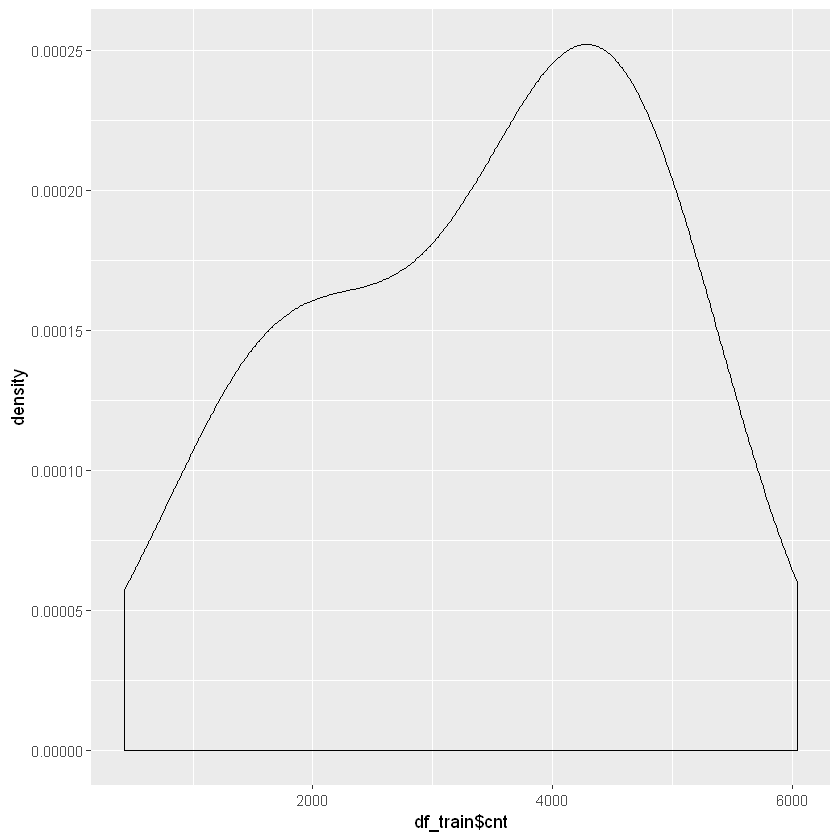

In [363]:
print(ggplot(df_train,aes(x=df_train$cnt)) +
    geom_density(adjust=2))


Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

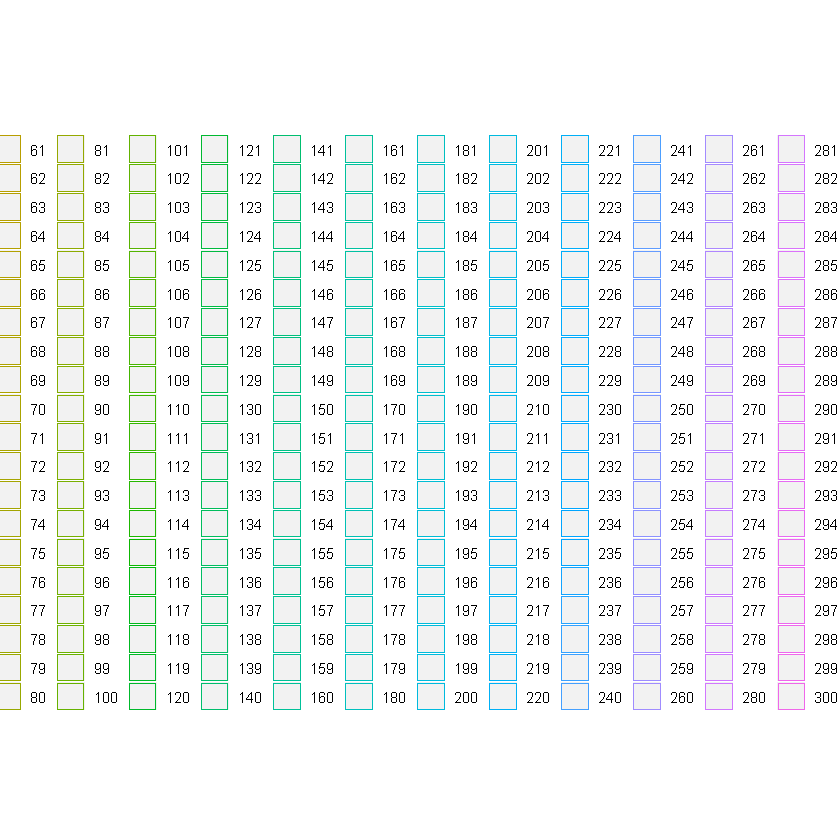

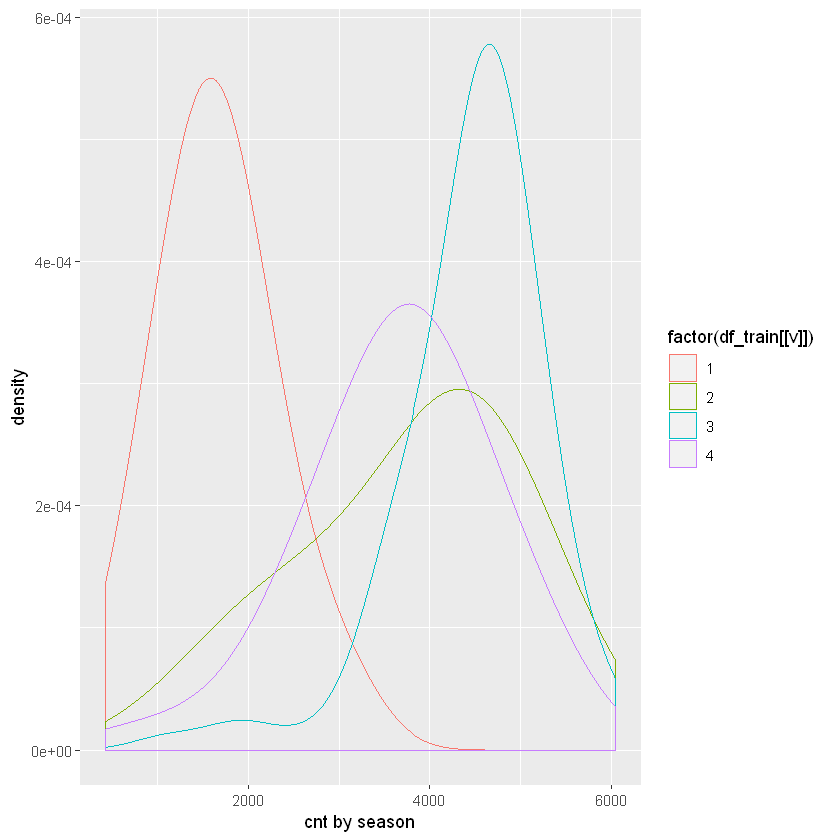

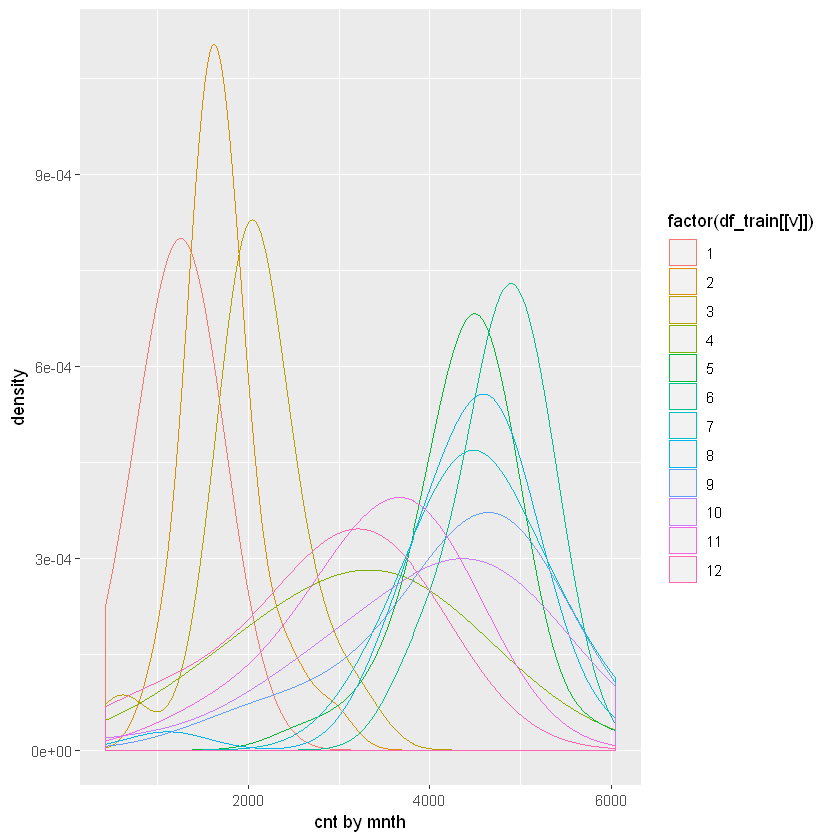

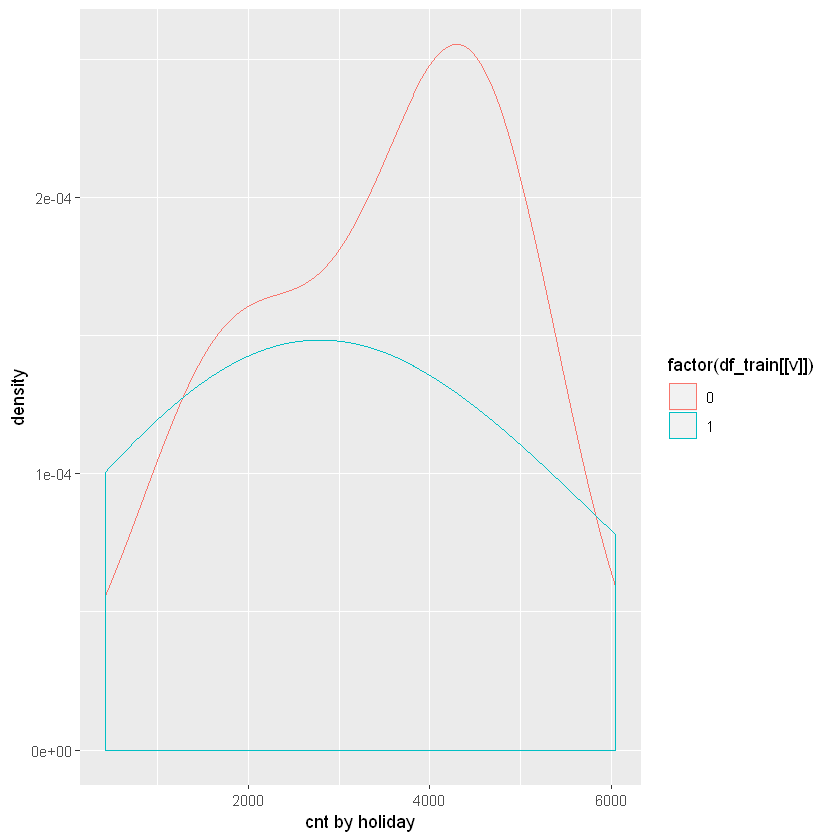

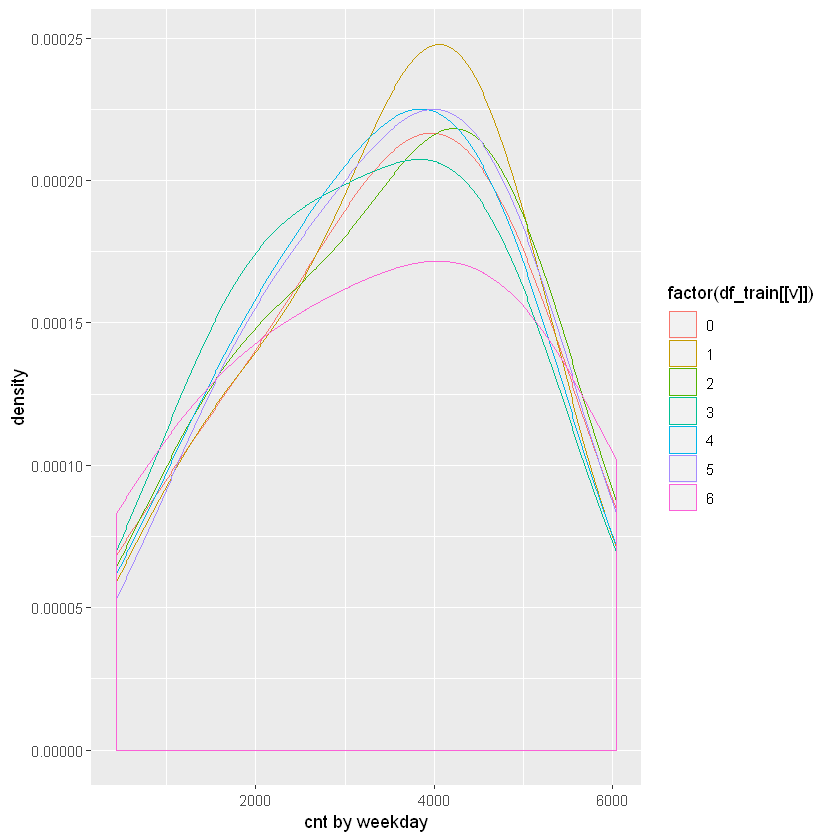

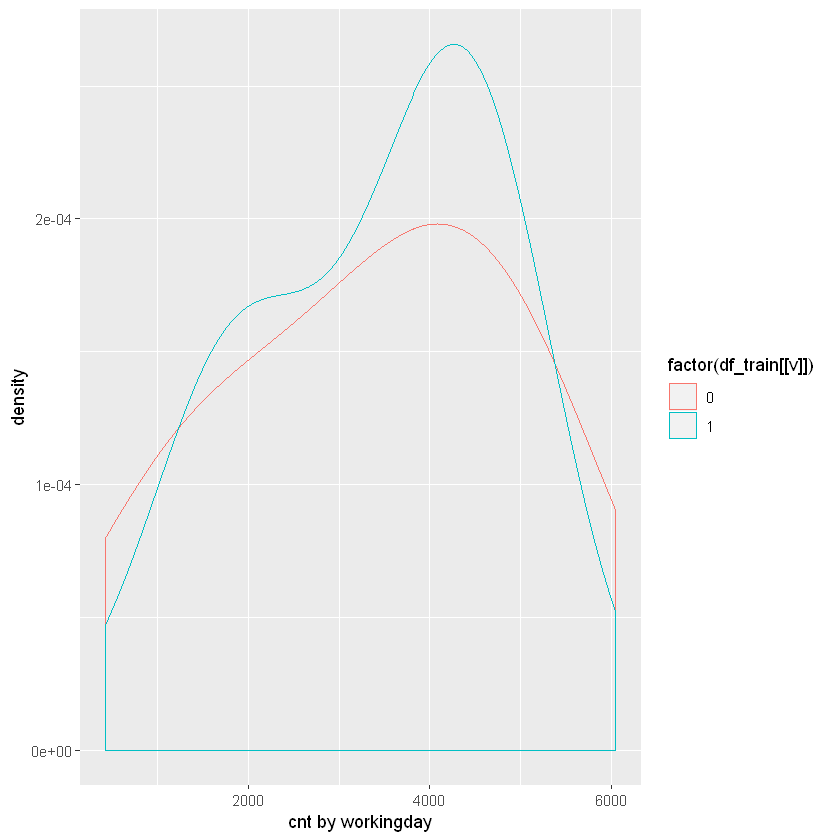

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

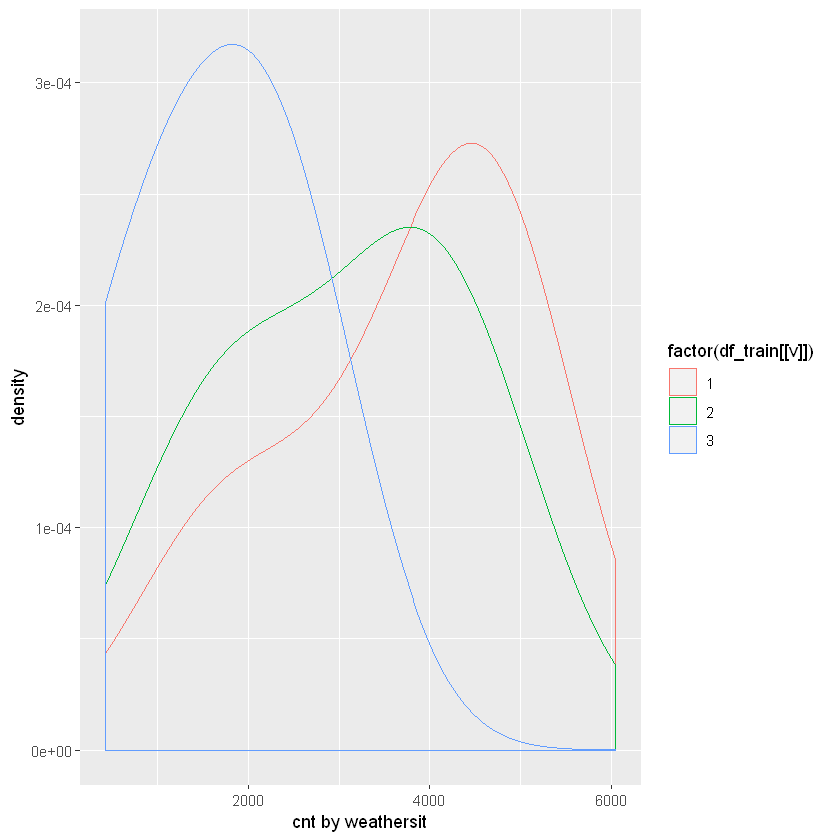

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

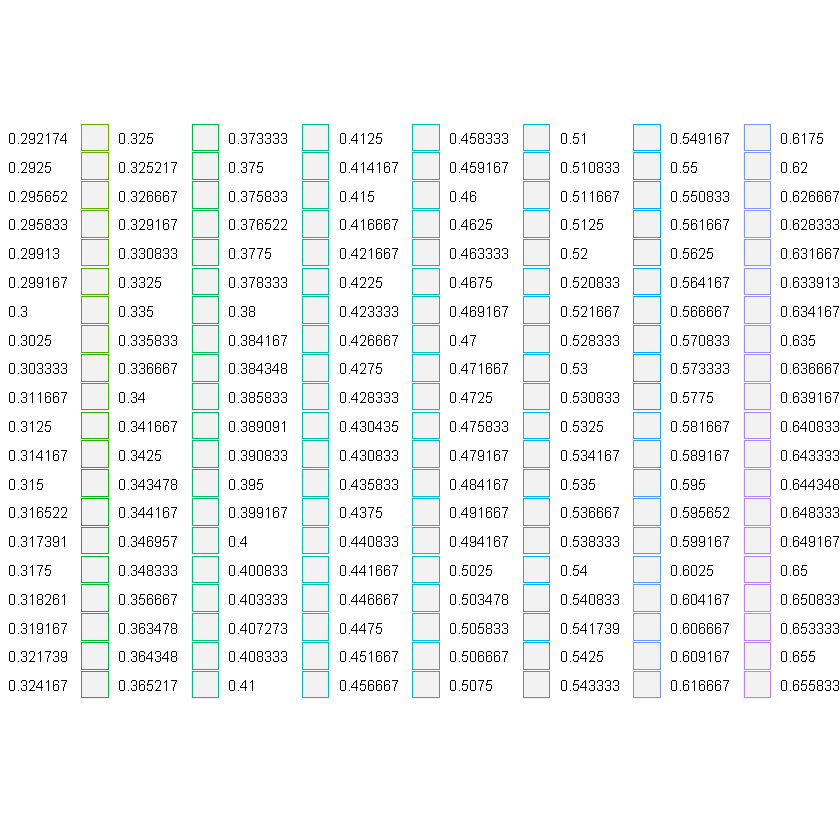

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

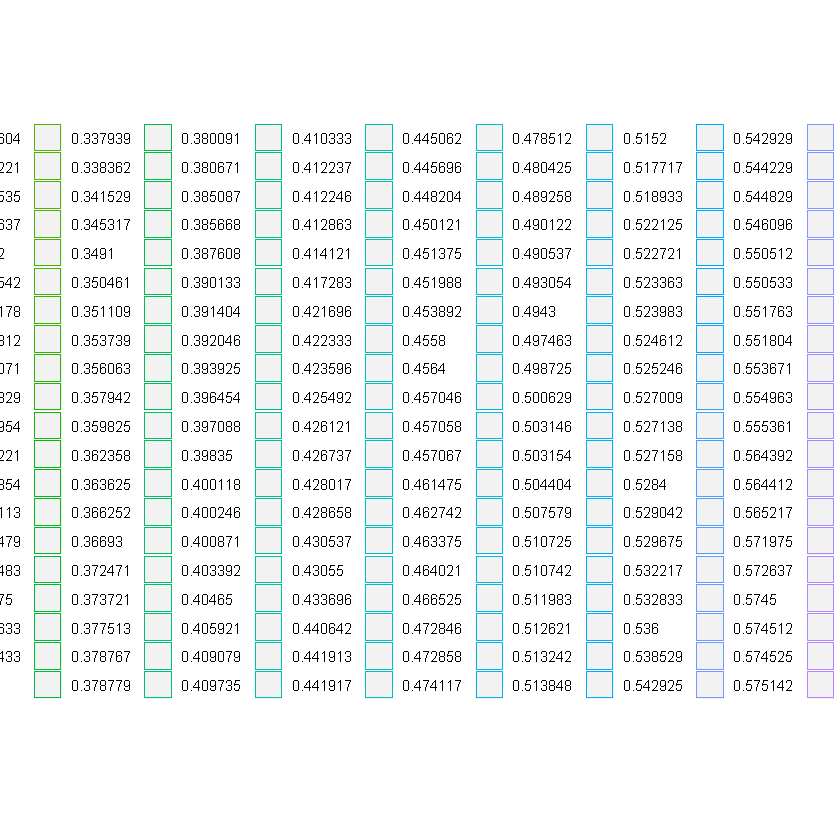

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


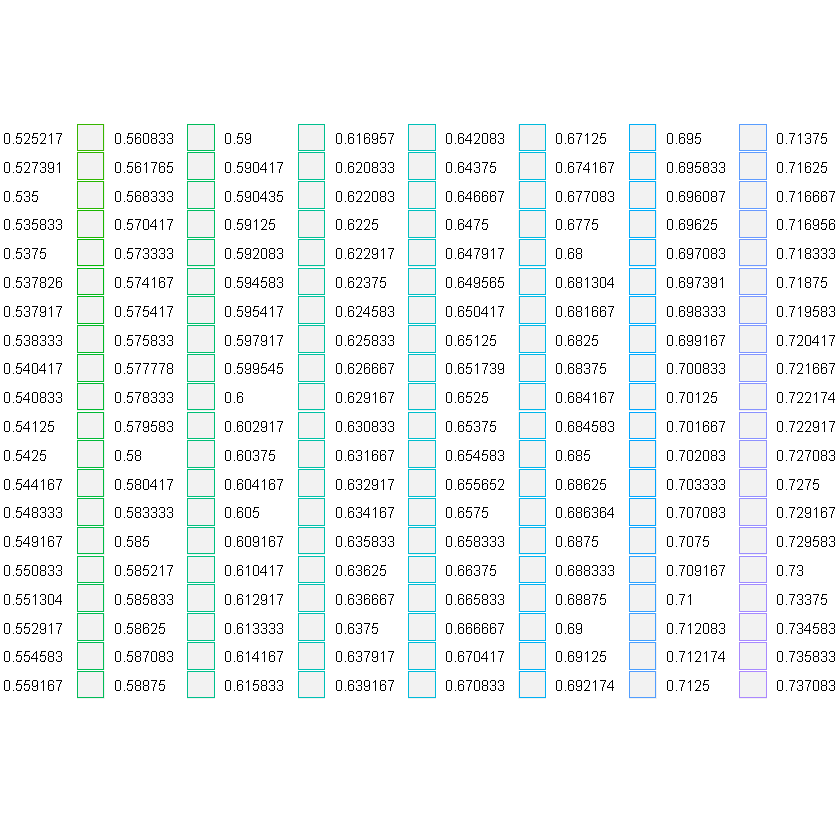

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

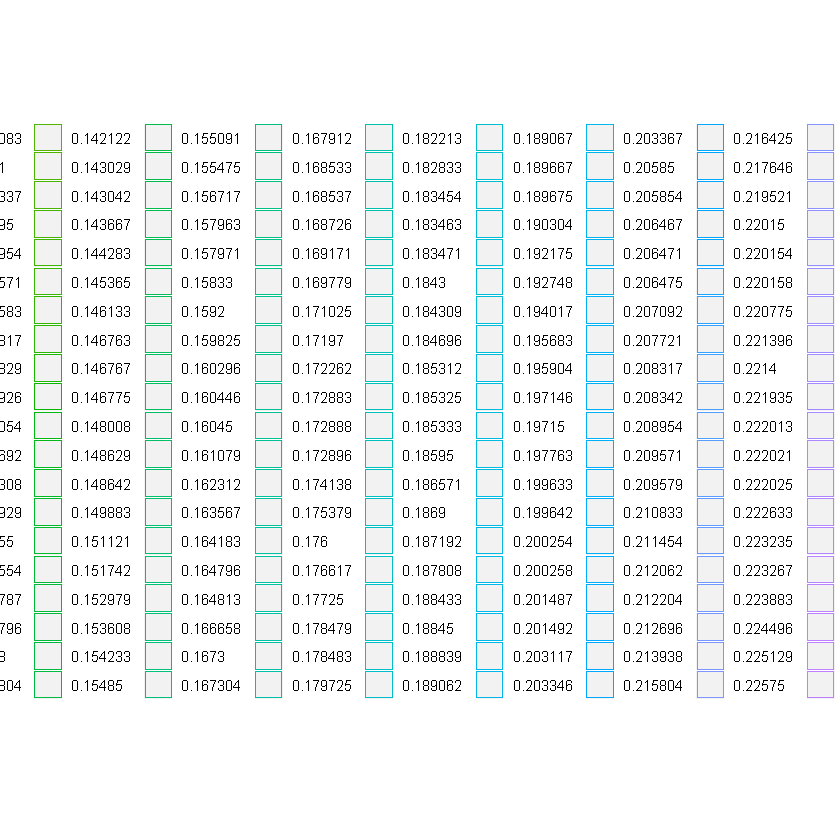

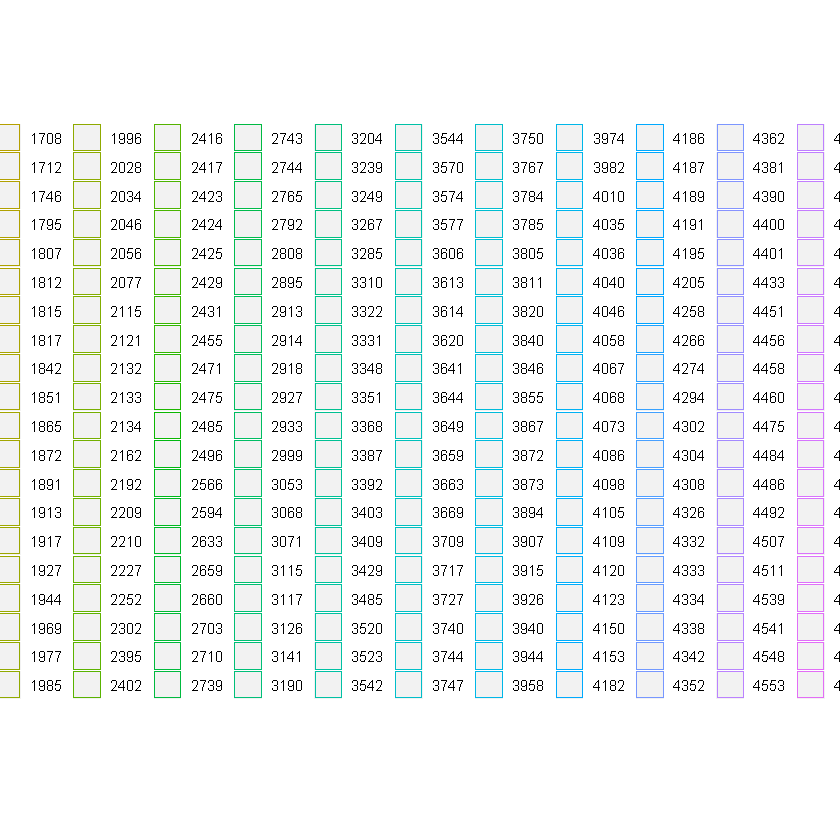

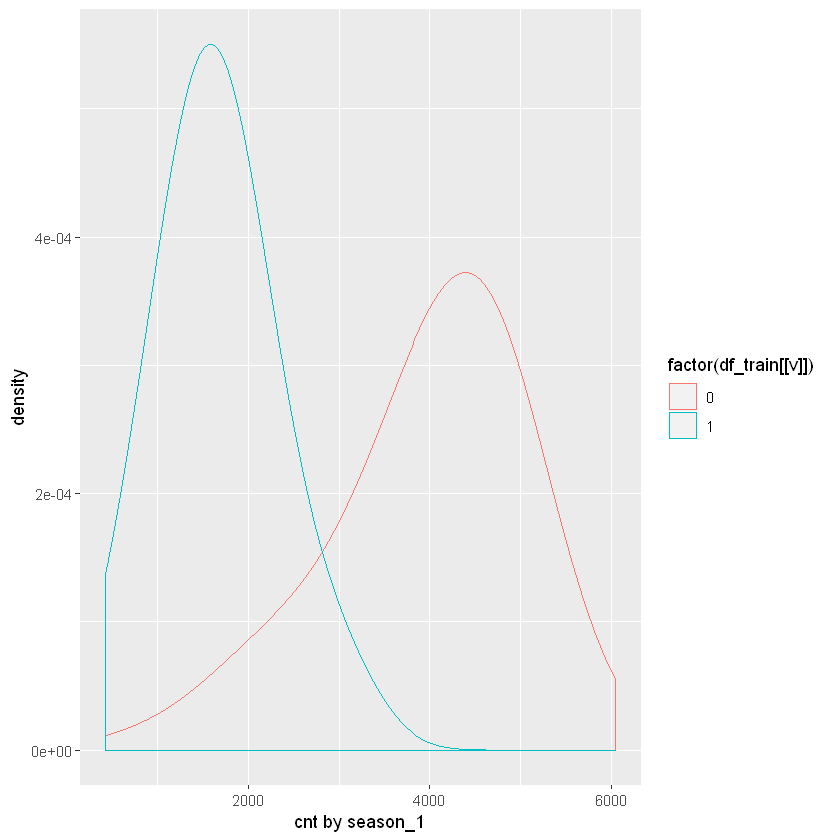

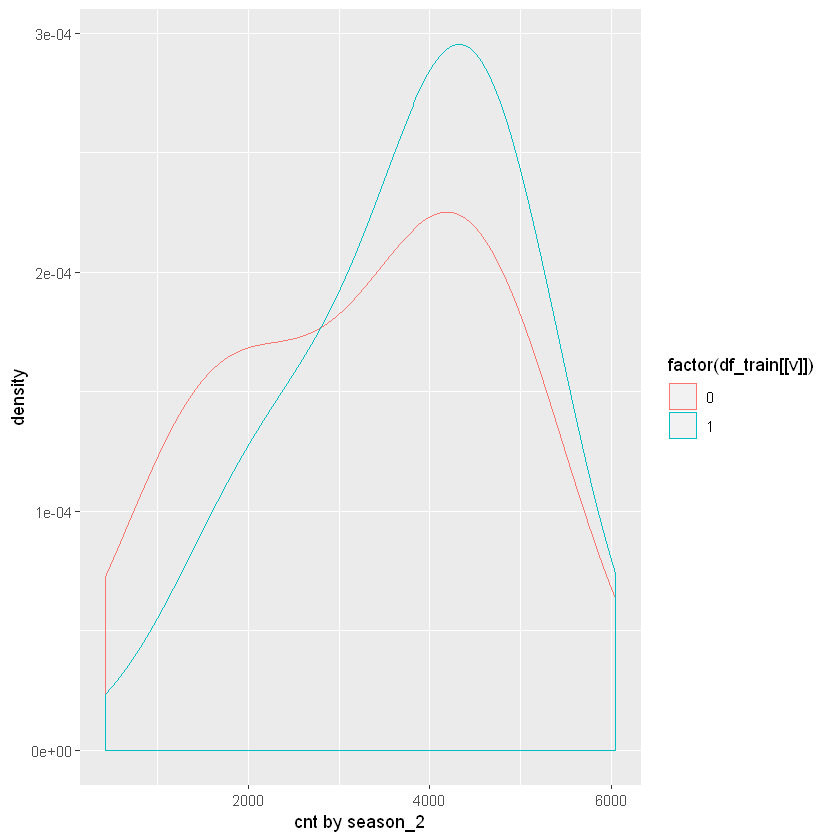

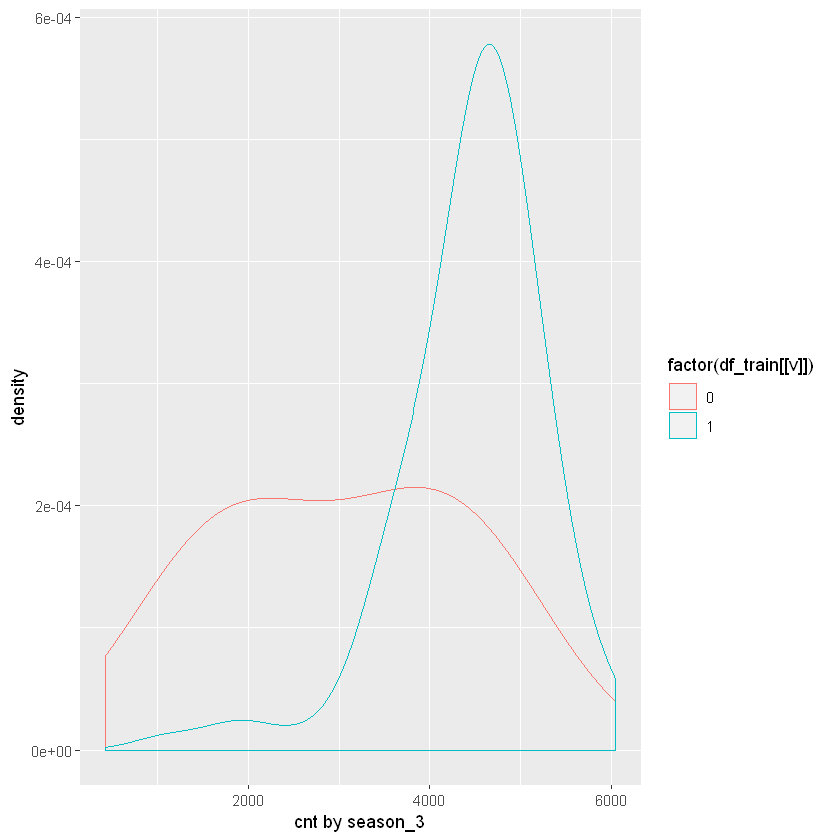

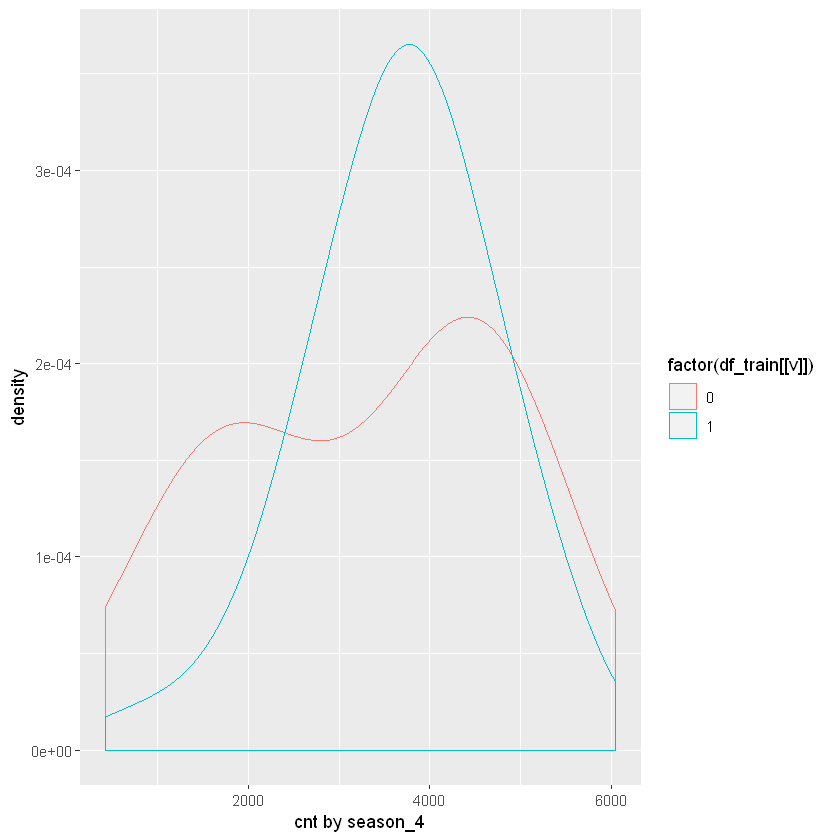

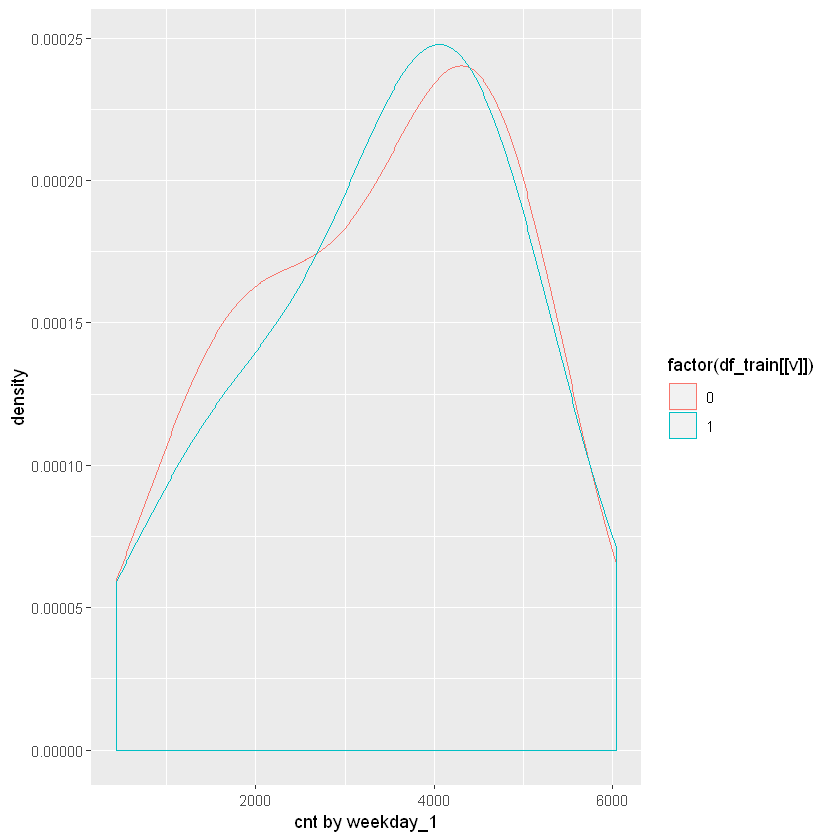

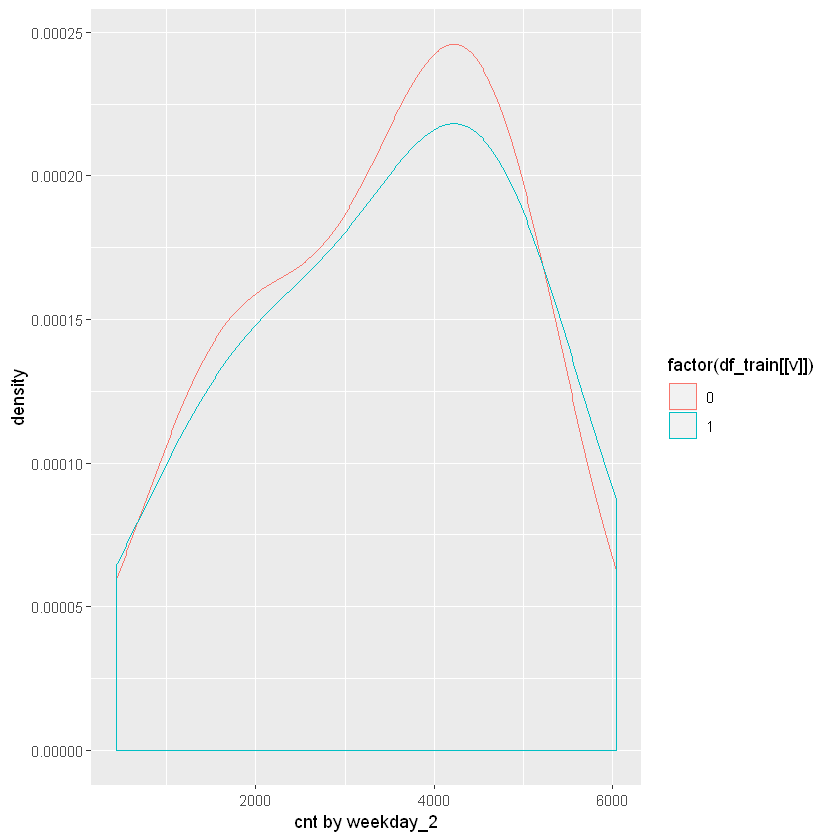

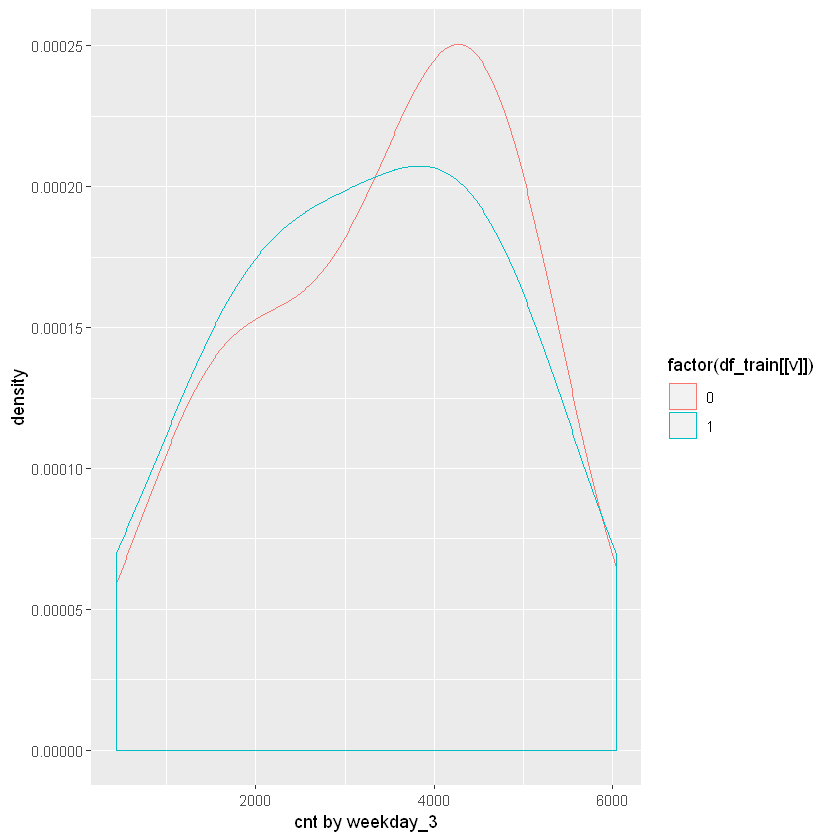

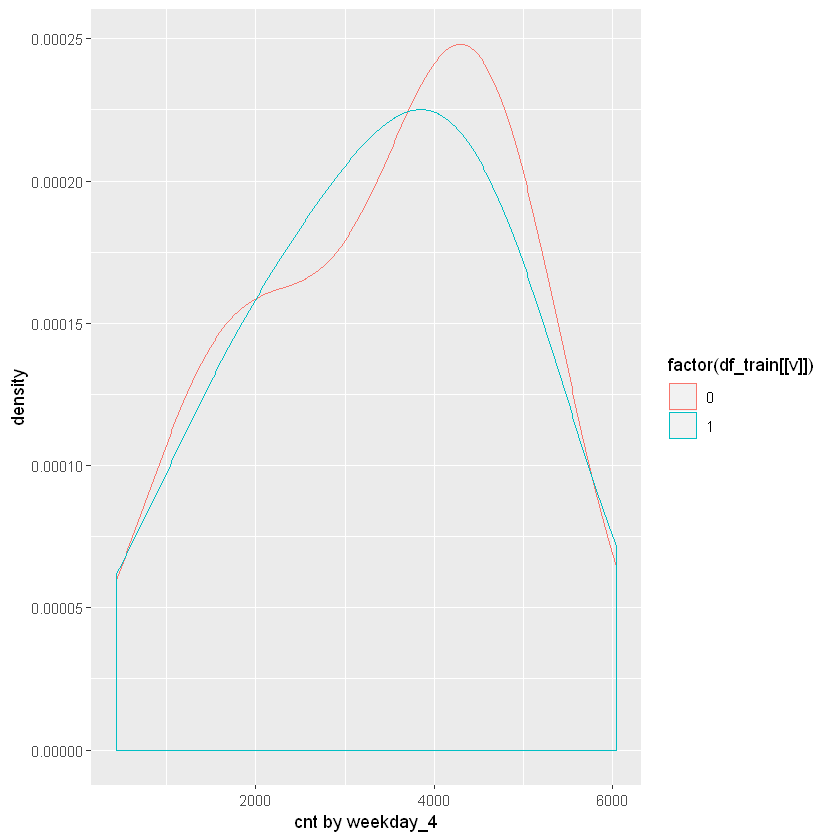

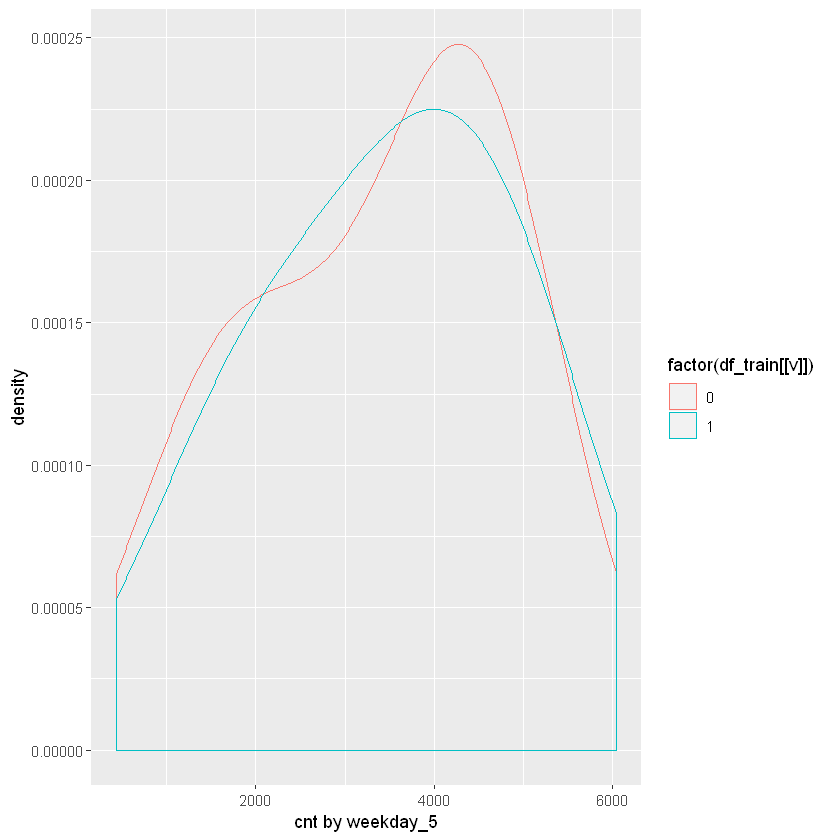

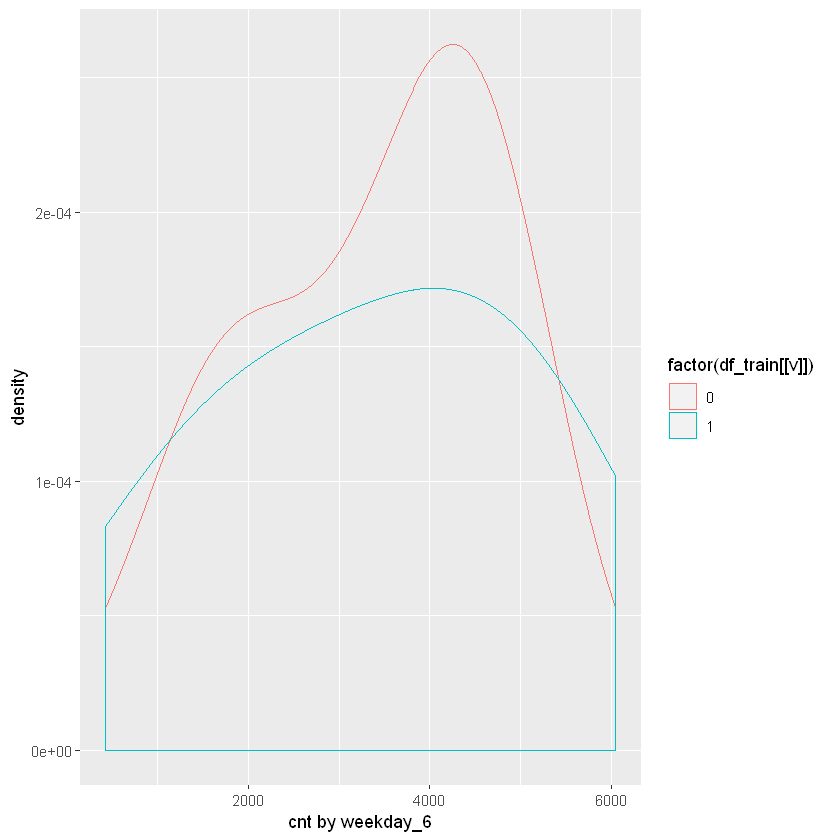

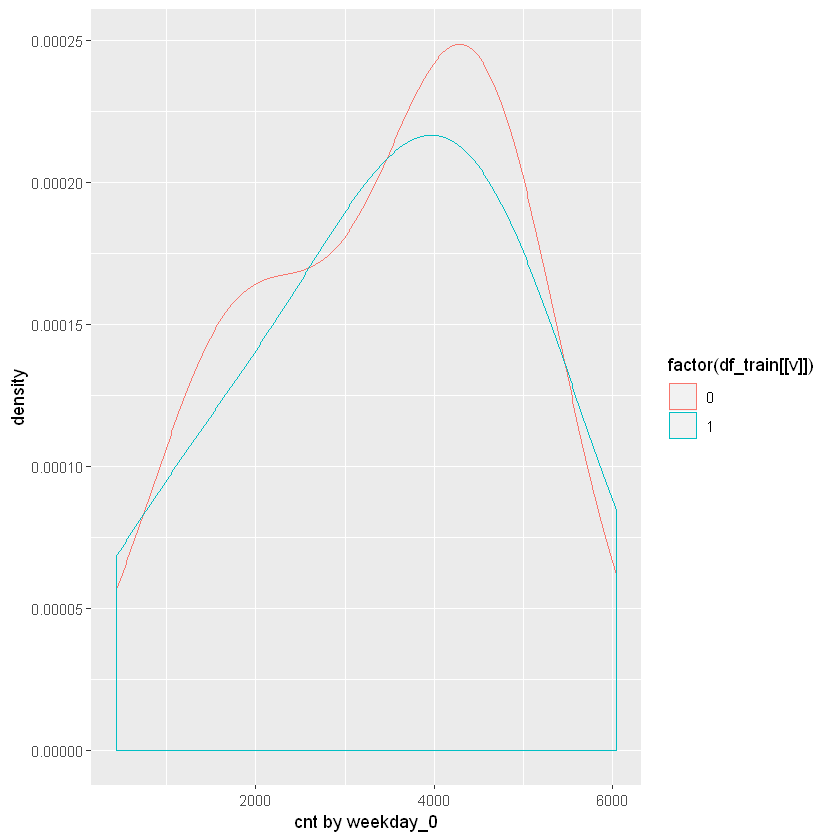

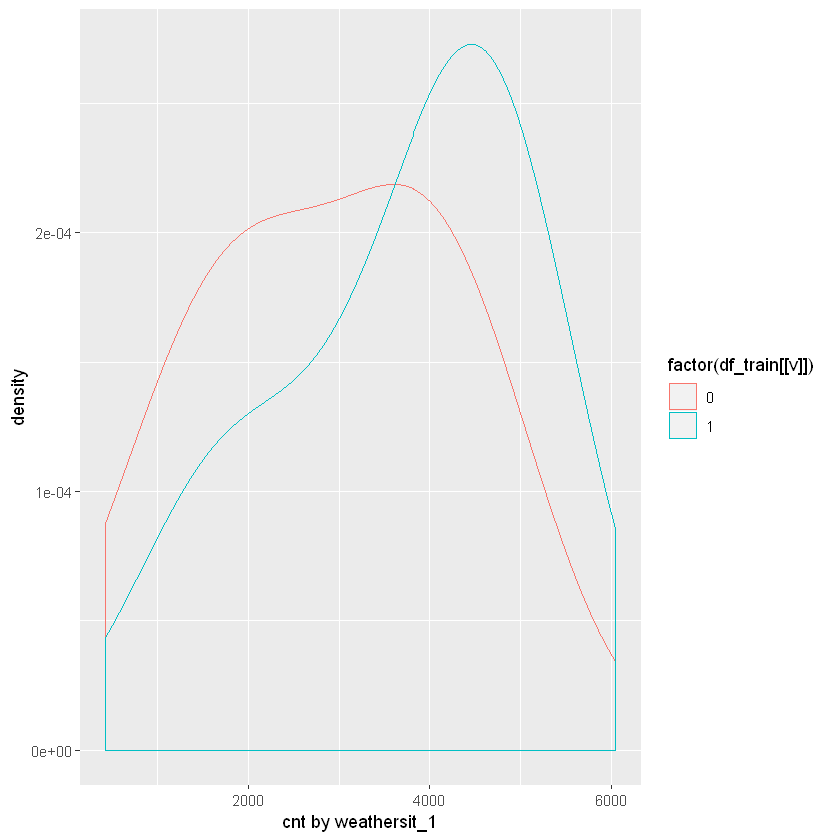

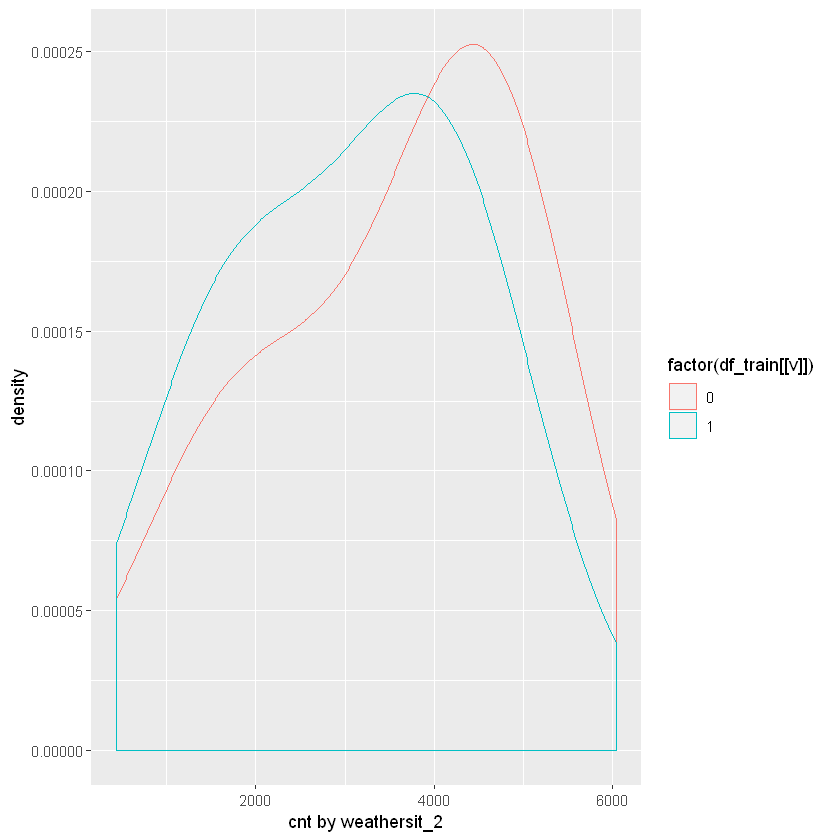

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

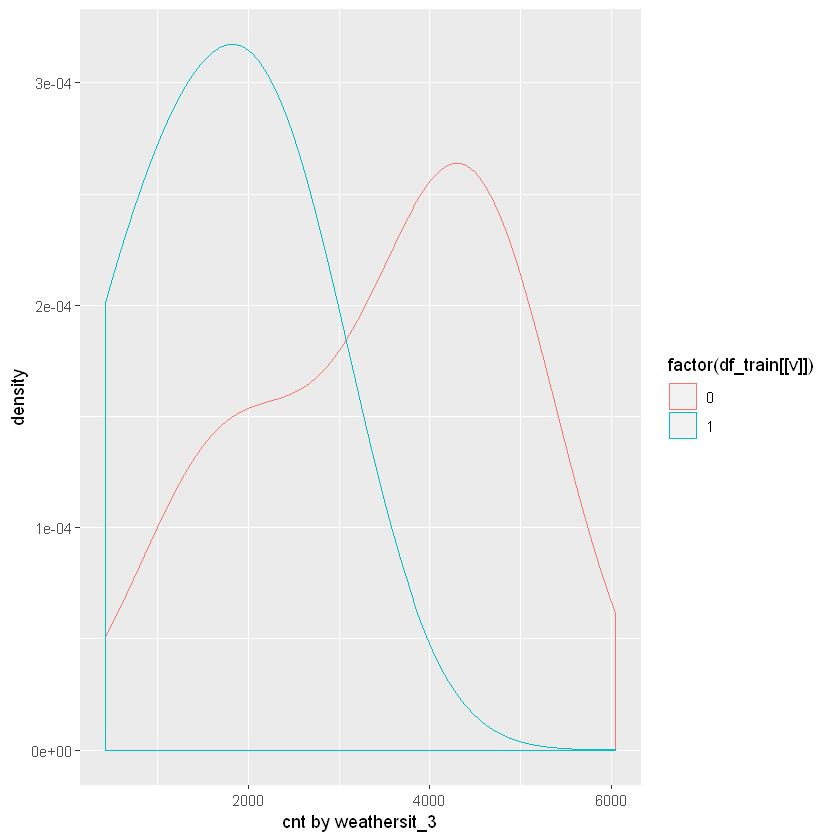

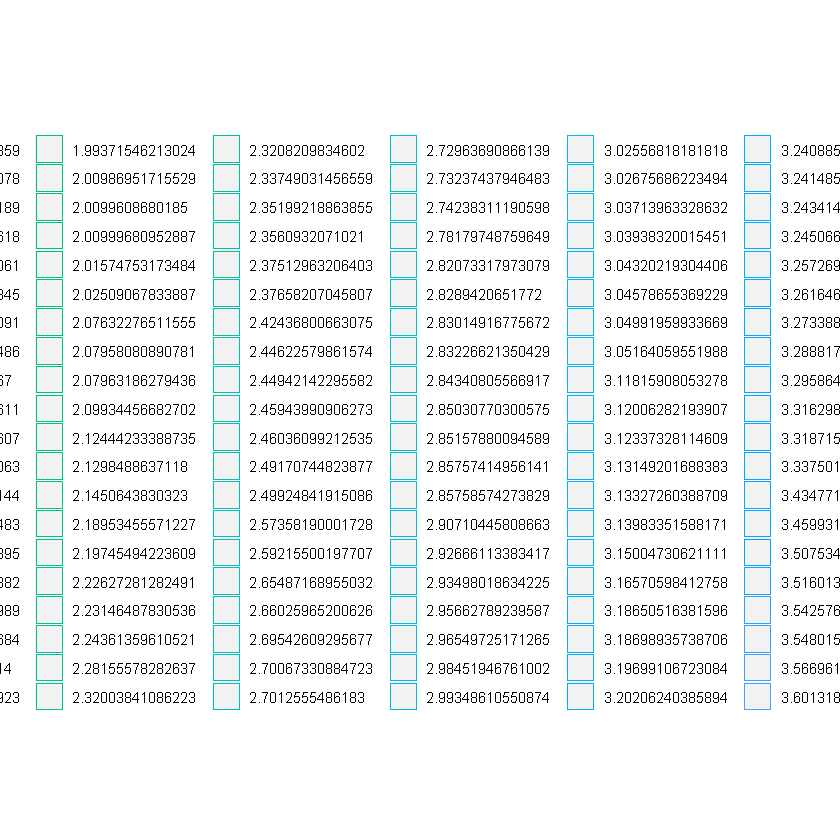

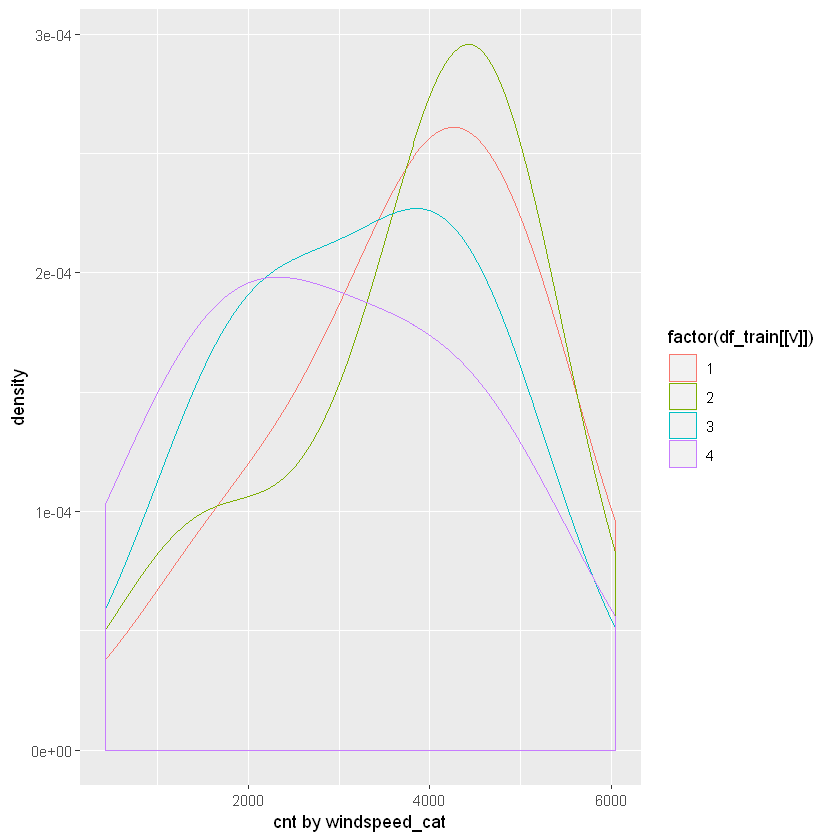

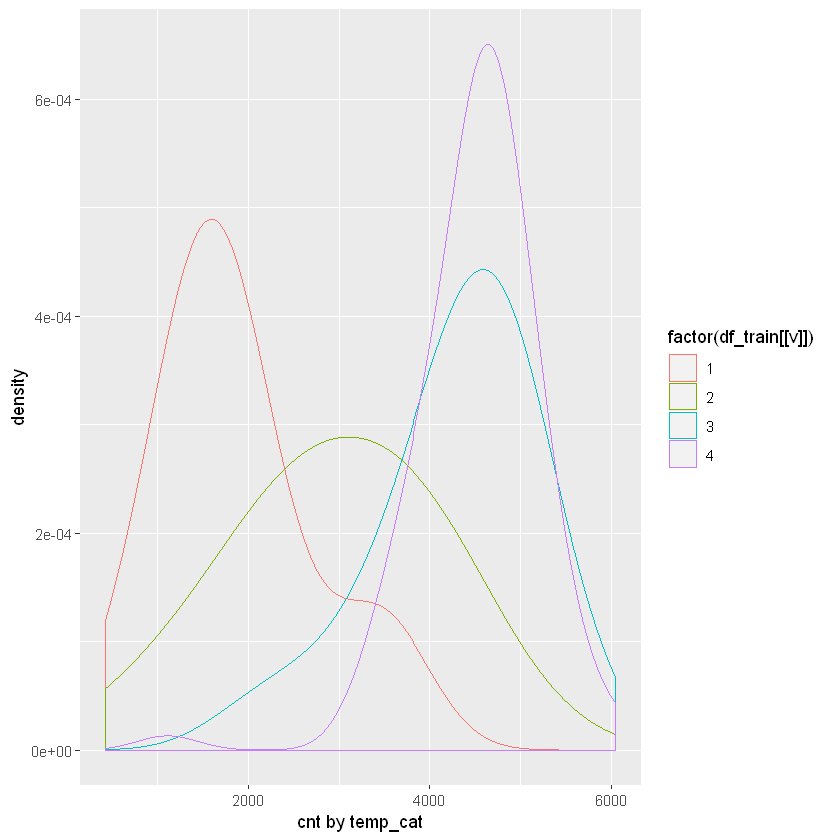

In [364]:
for (v in vn) {
    print(ggplot(df_train,aes(x=df_train$cnt, group=factor(df_train[[v]]),
                          color=factor(df_train[[v]]))) + xlab(paste('cnt by',v,sep=' ')) +
    geom_density(adjust=2))
}

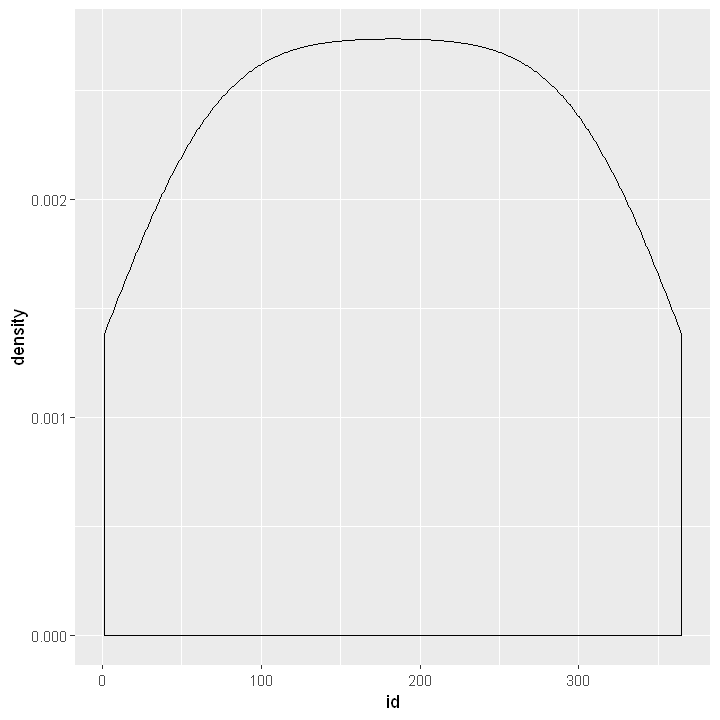

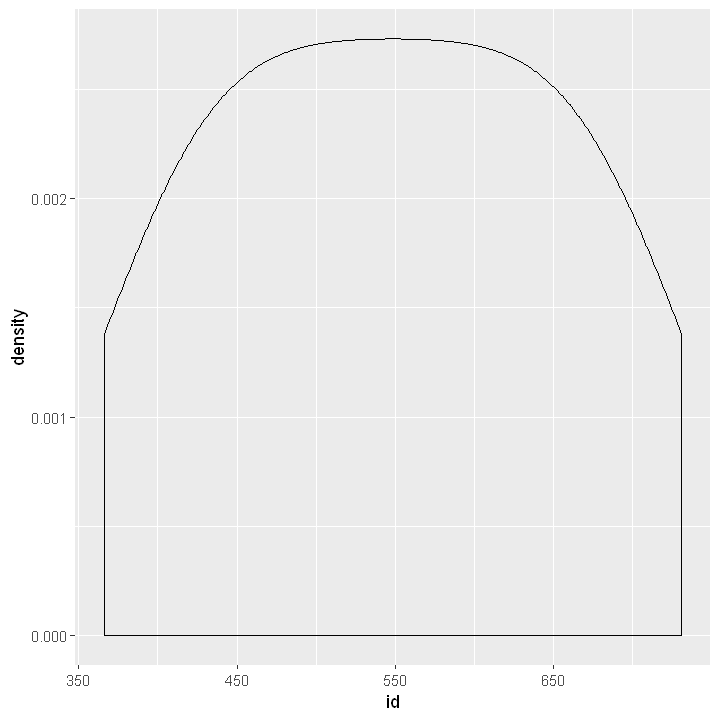

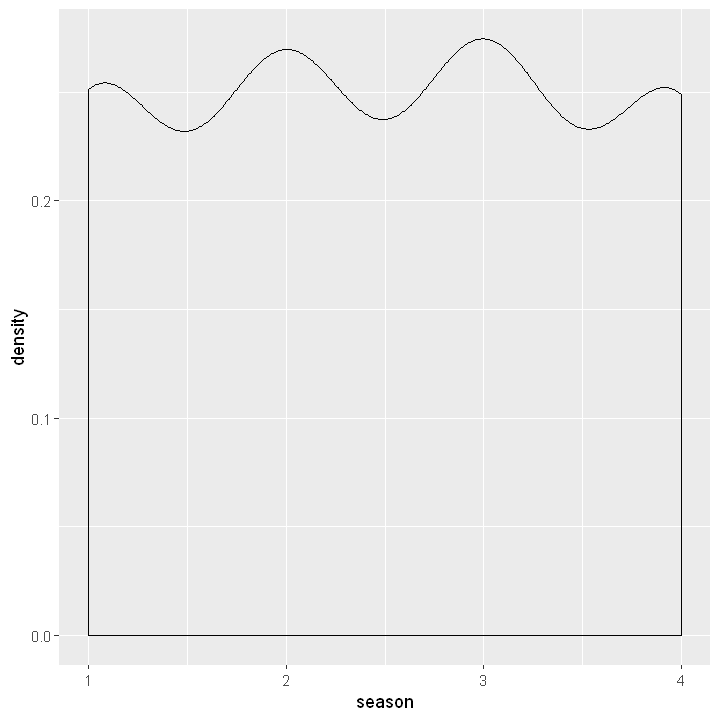

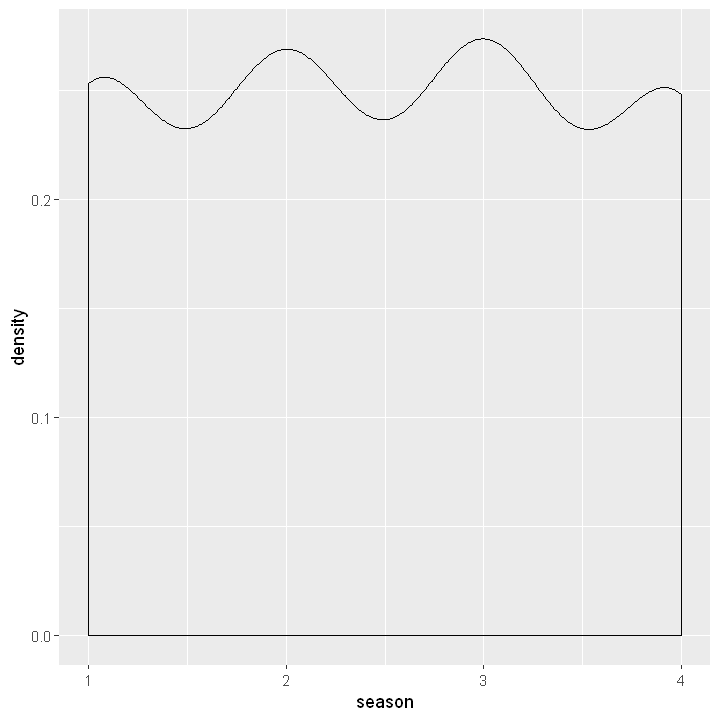

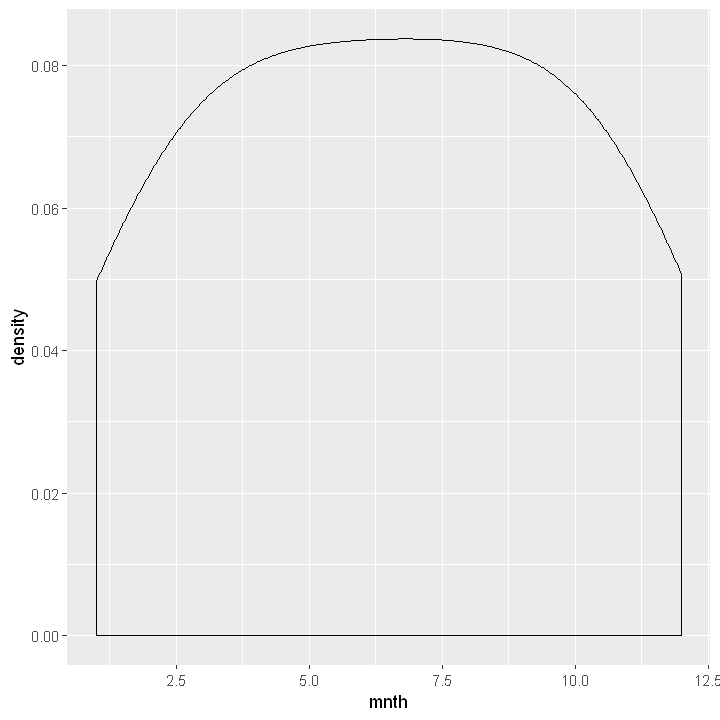

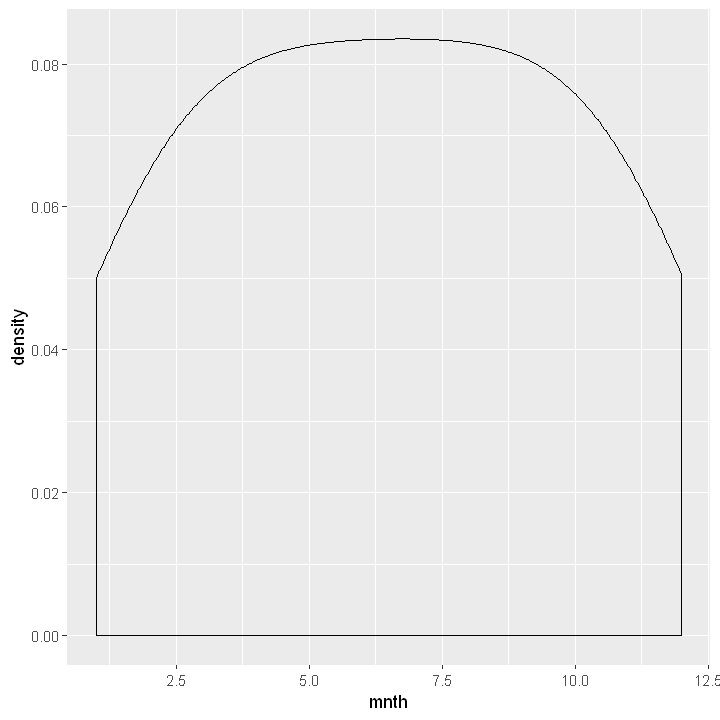

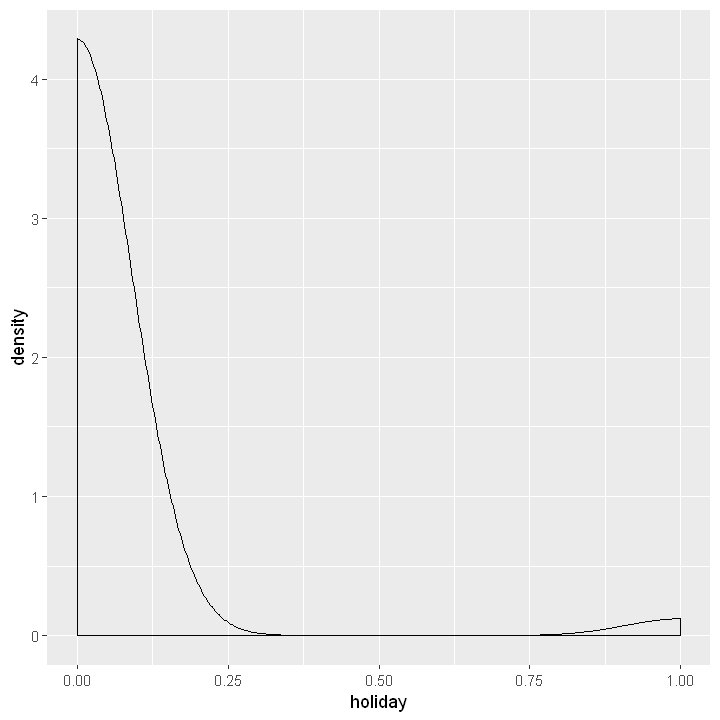

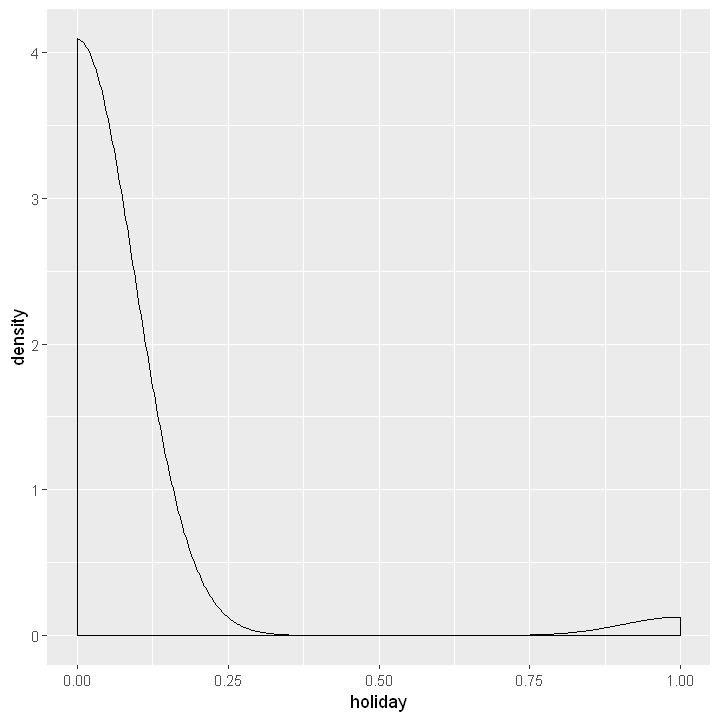

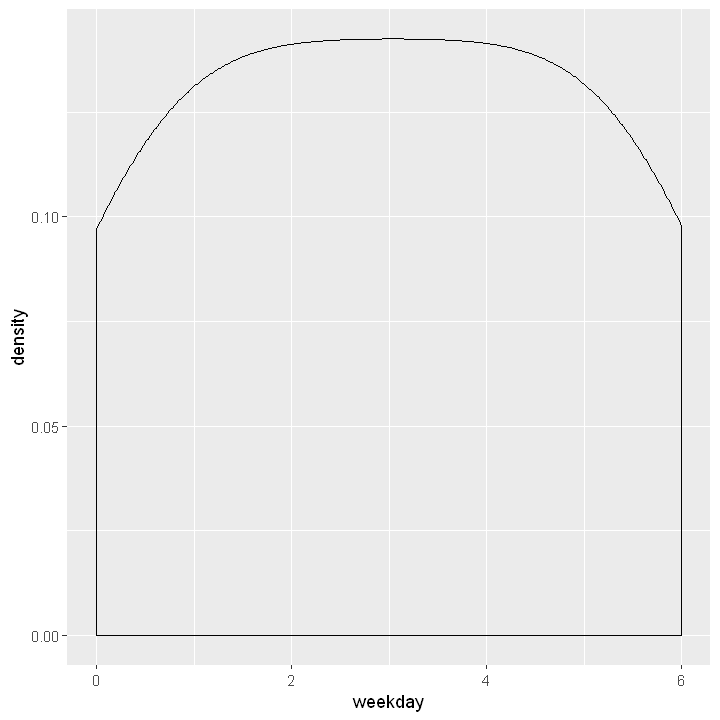

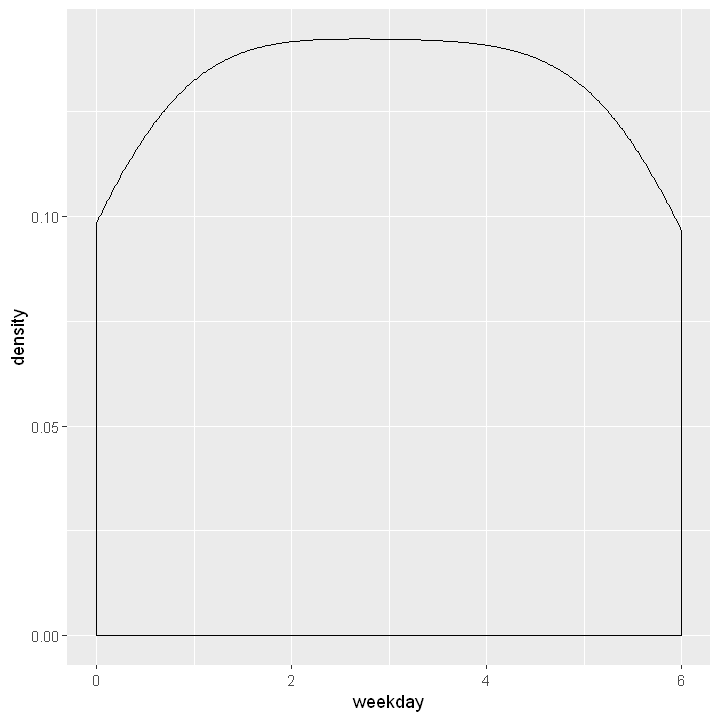

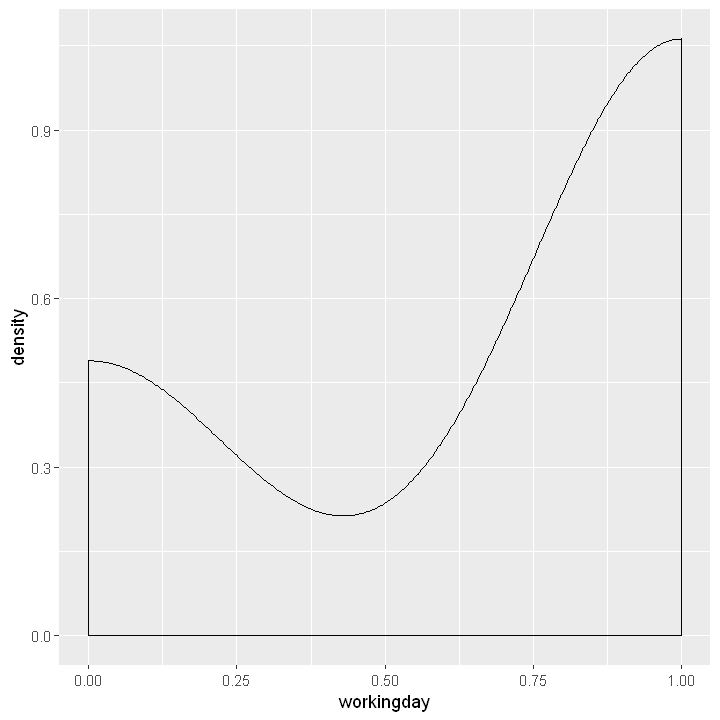

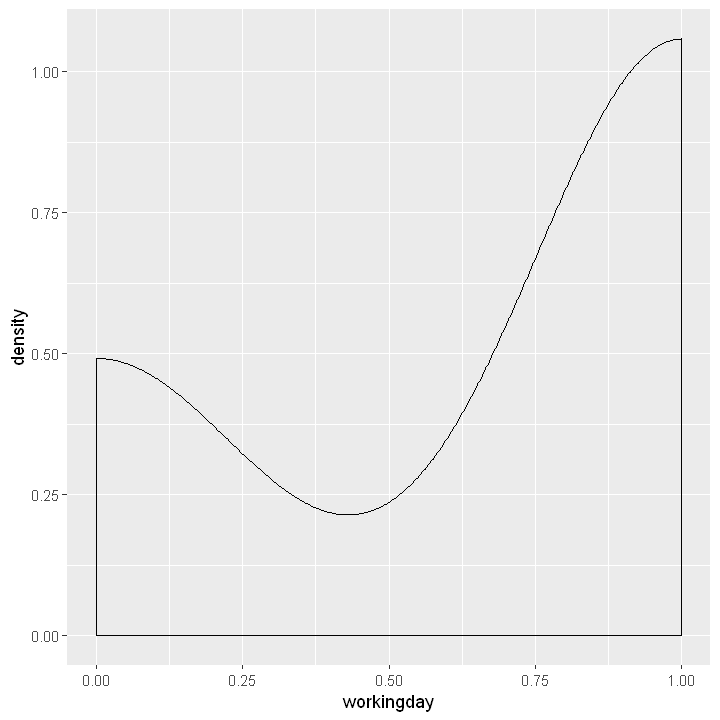

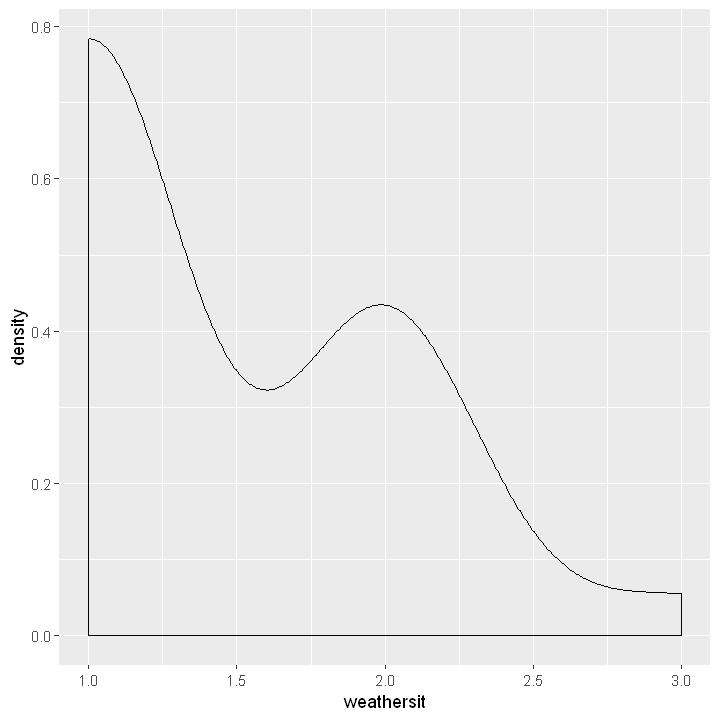

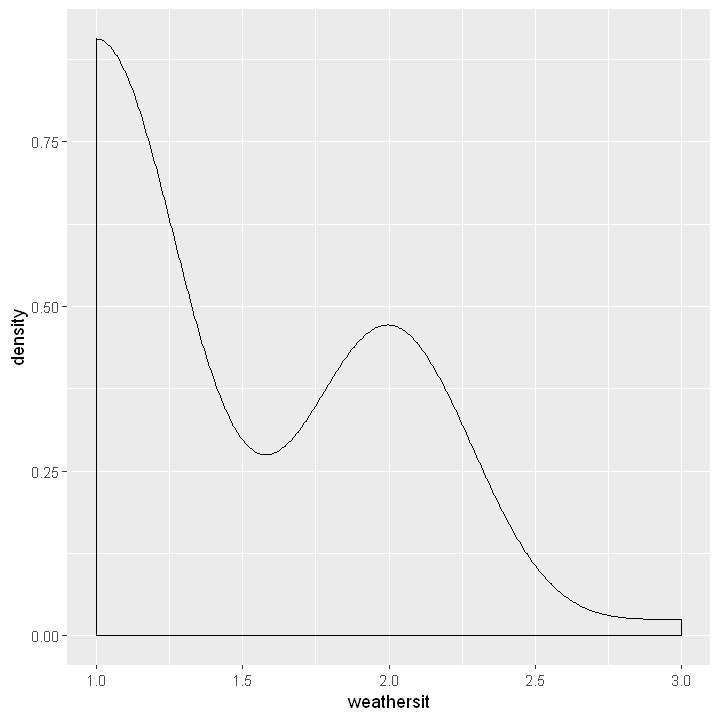

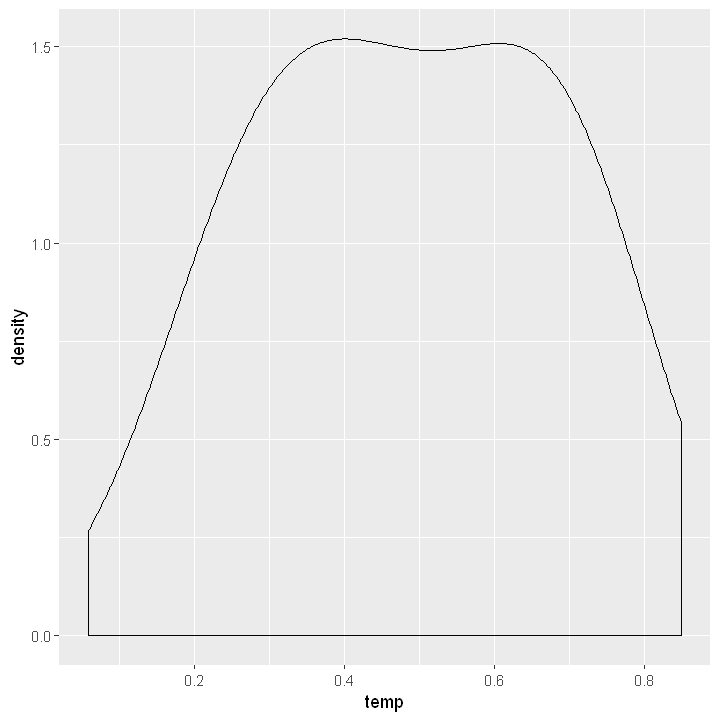

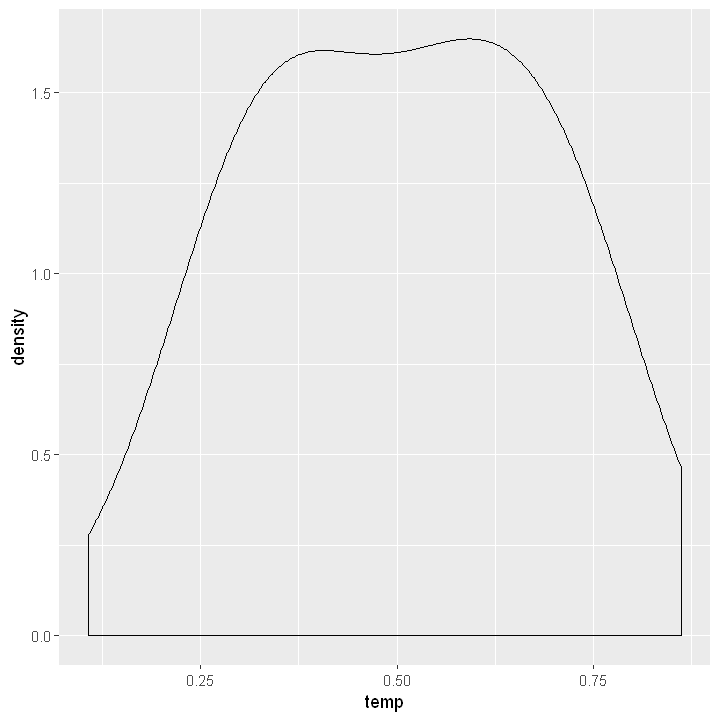

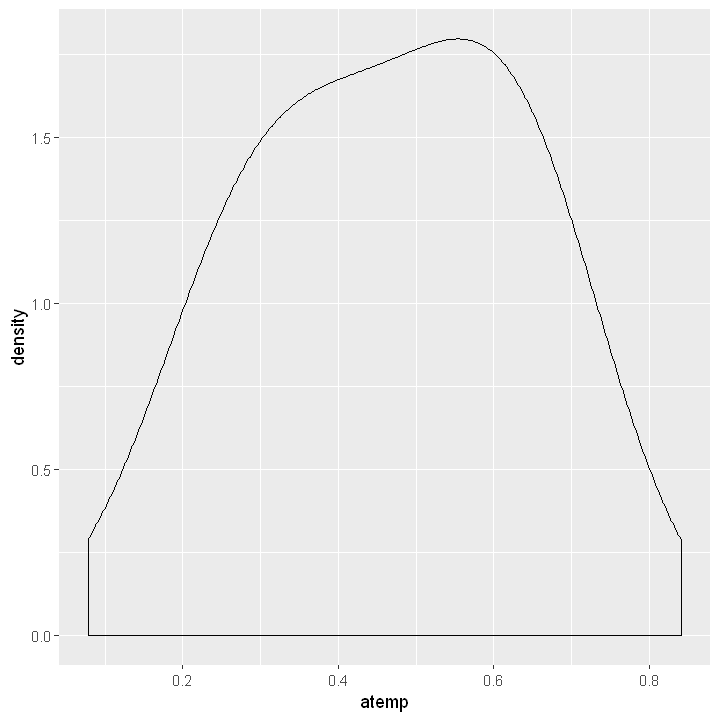

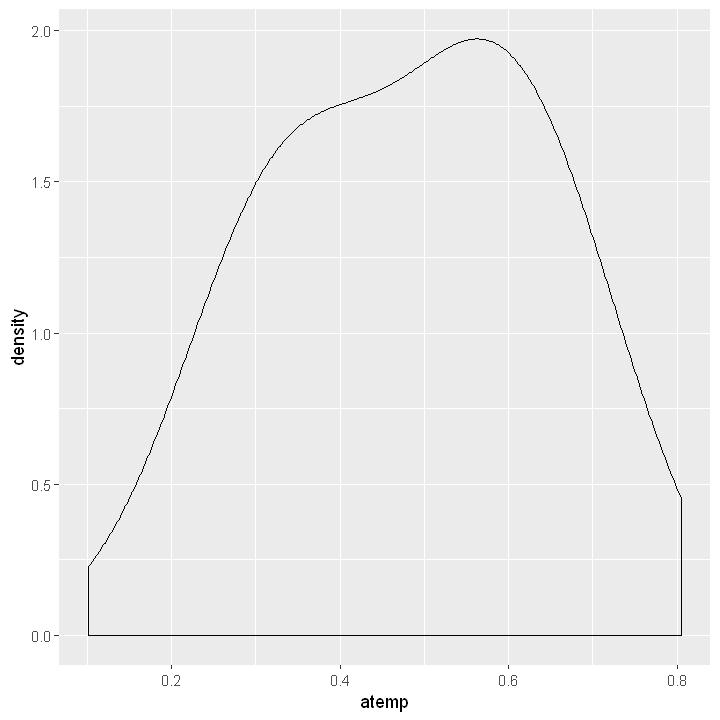

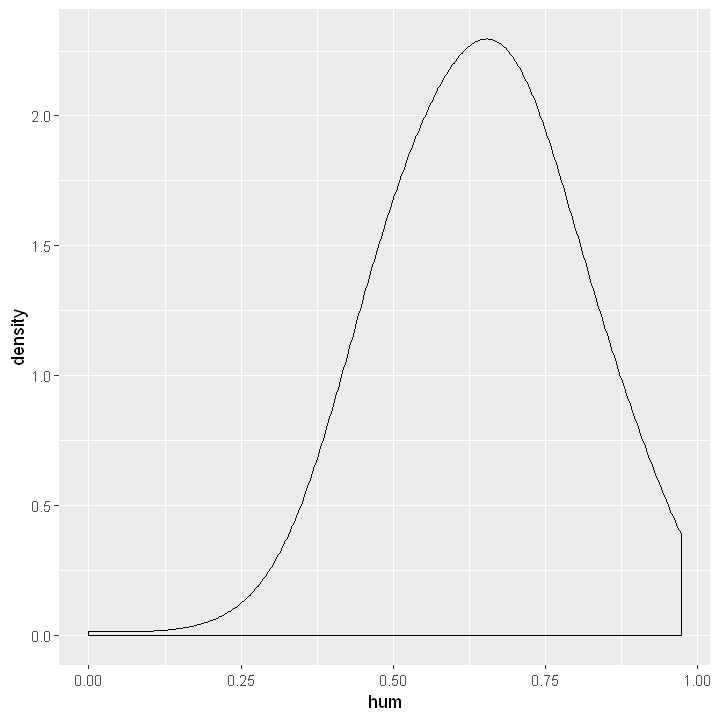

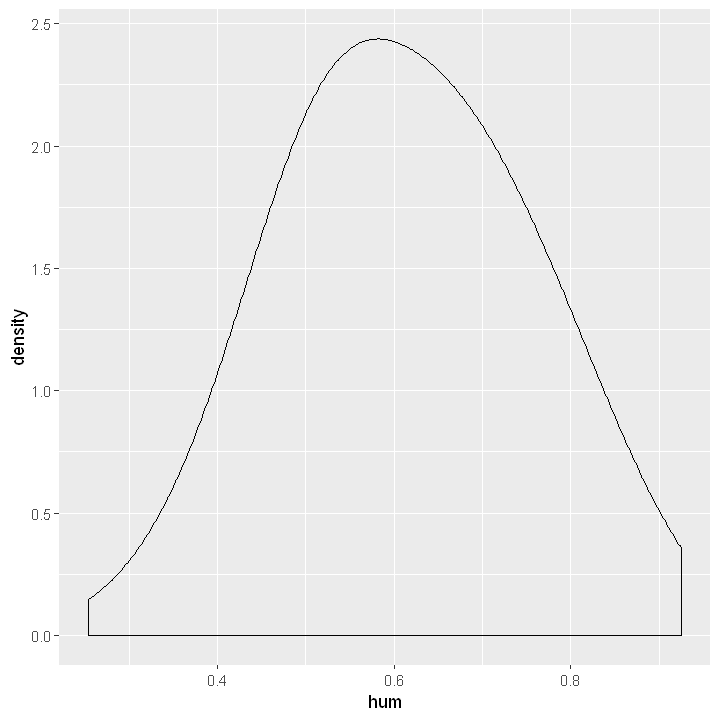

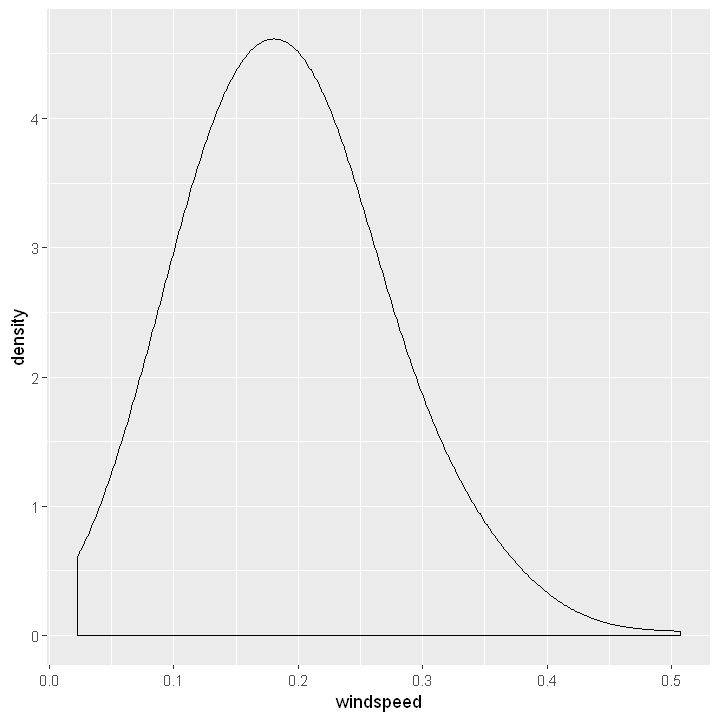

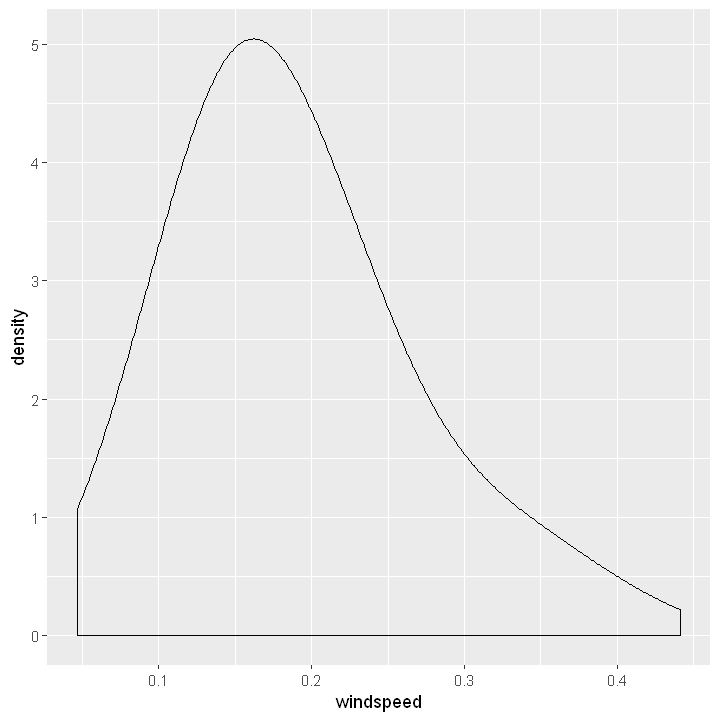

ERROR: Error: stat_density requires the following missing aesthetics: x


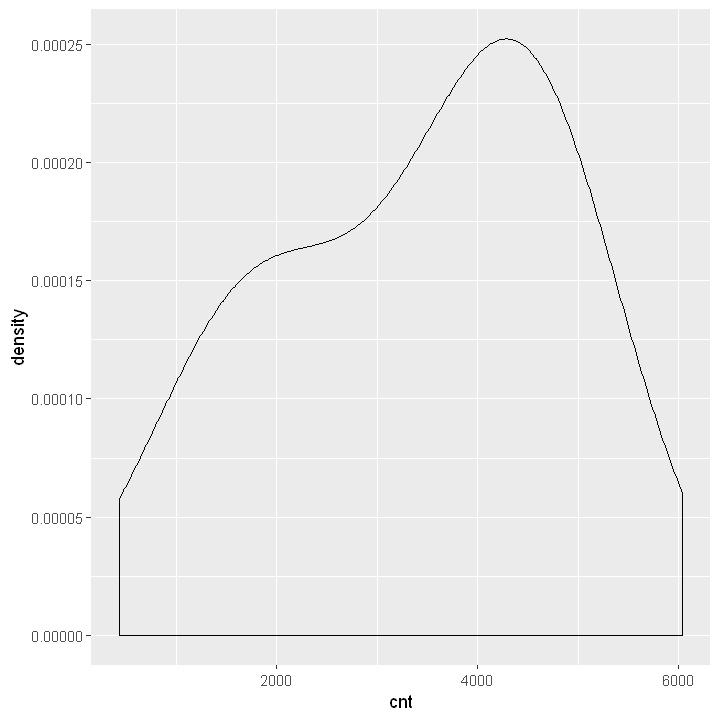

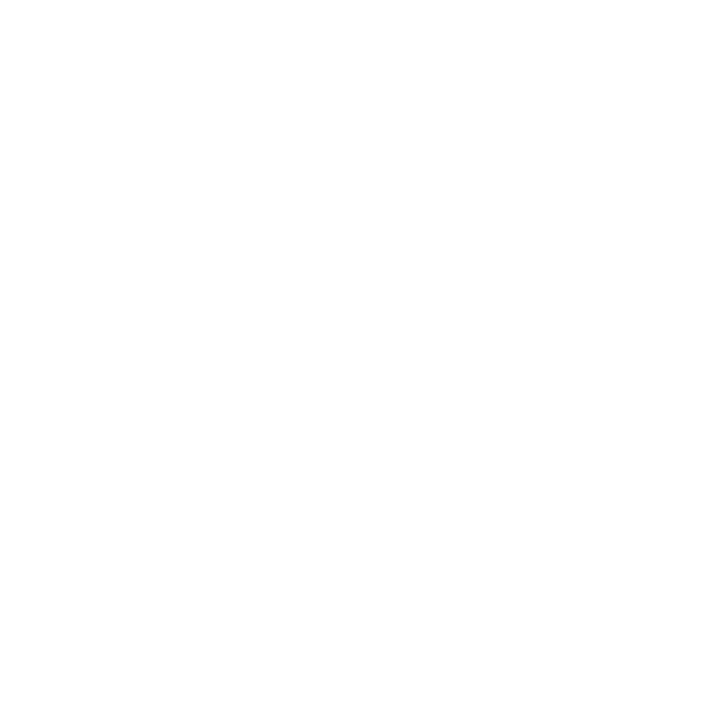

In [52]:
par(mfrow=c(2,2))
options(repr.plot.width=6,repr.plot.height=6)
for (v in vn) {
    print(ggplot(df_train,aes(x=df_train[[v]])) + xlab(v) +
    geom_density(adjust=2))
    print(ggplot(df_test,aes(x=df_test[[v]])) + xlab(v) +
    geom_density(adjust=2))
}

In [365]:
df_train <- df_train[ , !names(df_train)== 'atemp']
df_test <- df_test[ , !names(df_test)== 'atemp']

In [366]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [367]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res_1 <- NULL
err_res_2 <- NULL


In [275]:
## model with only the original variables
mod1 <- lm(cnt ~., data=df_train)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2420.9  -359.4    -6.2   410.8  1740.2 

Coefficients: (7 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3410.889    693.425   4.919 1.35e-06 ***
id               -4.644      3.688  -1.259 0.208795    
season          433.389    139.523   3.106 0.002052 ** 
mnth            182.479    113.355   1.610 0.108359    
holiday        -368.130    227.656  -1.617 0.106785    
weekday          26.155     20.024   1.306 0.192347    
workingday       41.885    111.311   0.376 0.706931    
weathersit    -1352.498    177.014  -7.641 2.17e-13 ***
temp           5473.667   2308.139   2.371 0.018268 *  
atemp         -3112.280   2447.138  -1.272 0.204302    
hum            -946.149    305.363  -3.098 0.002106 ** 
windspeed     -3934.952   1084.097  -3.630 0.000327 ***
season_1        138.890    390.331   0.356 0.722190    
season_2        727.

In [56]:
pred1a <- predict(mod1,newdata=df_test)
pred1b <- predict(mod1,newdata=df_train)

rmse(df_train$cnt,pred1b)
rmsle(df_train$cnt,pred1b)

err_res_2 <- rbind(err_res_2, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE=rmse(df_train$cnt,pred1b), 
                                     RMSLE=rmsle(df_train$cnt,pred1b)))


Warning message in predict.lm(mod1, newdata = df_test):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(mod1, newdata = df_train):
"prediction from a rank-deficient fit may be misleading"


[1] 596.9009

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.2303056

Warning message in log(y_hat + 1):
"NaNs produced"


In [58]:
pred1a <- as.data.frame(pred1a)
pred1a

,pred1a
,<dbl>
1,57.06948
2,-734.34734
3,-938.48078
4,-1133.48485
5,-169.88143
6,157.95625
7,390.40146
8,101.55019
9,-736.76359


In [41]:
write.table(pred1a, file = "../Data/linearmodel.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [28]:
mod2 <- lm(temperature ~., data=train)
summary(mod2)


Call:
lm(formula = temperature ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5414  -1.1222   0.0124   1.1644  16.2124 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.250e+02  1.322e+01 -32.149  < 2e-16 ***
lat         -3.642e-02  9.181e-04 -39.669  < 2e-16 ***
long         3.360e-03  7.010e-04   4.793 1.65e-06 ***
month        1.148e-01  3.253e-03  35.273  < 2e-16 ***
year         2.484e-01  6.629e-03  37.473  < 2e-16 ***
cloudhigh    2.858e-02  1.317e-03  21.704  < 2e-16 ***
cloudlow    -8.402e-02  1.077e-03 -78.026  < 2e-16 ***
cloudmid     6.319e-03  1.684e-03   3.753 0.000175 ***
ozone       -2.617e-02  8.087e-04 -32.354  < 2e-16 ***
pressure     3.378e-02  3.151e-04 107.206  < 2e-16 ***
surftemp     6.822e-01  3.006e-03 226.936  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.893 on 28935 degrees of freedom
  (84 observations deleted due to missingne

Decision tree

In [368]:
#install.packages("tree")
#install.packages("rpart")
library(tree)
library(rpart)

In [369]:
mod3 <- tree(cnt ~., data=df_train)
mod3

node), split, n, deviance, yval
      * denotes terminal node

 1) root 365 692000000 3406  
   2) temp < 0.45875 168 171500000 2274  
     4) season < 3 114  49070000 1784  
       8) id < 69.5 68  13330000 1475 *
       9) id > 69.5 46  19660000 2240 *
     5) season > 3 54  37290000 3308  
      10) weathersit < 2.5 49  16250000 3492 *
      11) weathersit > 2.5 5   3106000 1504 *
   3) temp > 0.45875 197 121600000 4371  
     6) weathersit < 2.5 191  95210000 4435  
      12) id < 109.5 9   1389000 3076 *
      13) id > 109.5 182  76360000 4502  
        26) weathersit < 1.5 123  32240000 4684 *
        27) weathersit > 1.5 59  31580000 4123 *
     7) weathersit > 2.5 6    580000 2330 *

In [370]:
pred3 <- predict(mod3,newdata=df_test)

In [371]:
pred3

1        2        3        4        5        6        7        8 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
       9       10       11       12       13       14       15       16 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      17       18       19       20       21       22       23       24 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      25       26       27       28       29       30       31       32 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 4684.252 
      33       34       35       36       37       38       39       40 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      41       42       43       44       45       46       47       48 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      49       50       51       52       53       54       55       56 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      57       58       59       60       61       62       63       64 
2240.239 2240.239 2240.239 2240.239 4684.252 2240.239 2240.239 2240.239 
      65       66       67       68       69       70       71       72 
2240.239 2240.239 2240.239 4684.252 2240.239 2240.239 2240.239 4684.252 
      73       74       75       76       77       78       79       80 
4684.252 4684.252 4684.252 2240.239 4123.458 4123.458 4684.252 4684.252 
      81       82       83       84       85       86       87       88 
4123.458 4684.252 4123.458 4123.458 2240.239 2240.239 2240.239 4684.252 
      89       90       91       92       93       94       95       96 
4684.252 2240.239 2240.239 2240.239 2240.239 4684.252 4684.252 2240.239 
      97       98       99      100      101      102      103      104 
2240.239 2240.239 4684.252 4684.252 2240.239 2240.239 2240.239 2240.239 
     105      106      107      108      109      110      111      112 
4684.252 4684.252 4684.252 4684.252 4123.458 4684.252 4684.252 4684.252 
     113      114      115      116      117      118      119      120 
2240.239 2240.239 2240.239 4684.252 4123.458 2240.239 2240.239 2240.239 
     121      122      123      124      125      126      127      128 
4123.458 4123.458 4684.252 4123.458 4684.252 4123.458 4123.458 4123.458 
     129      130      131      132      133      134      135      136 
4123.458 4123.458 4684.252 4684.252 4684.252 4684.252 4123.458 4123.458 
     137      138      139      140      141      142      143      144 
4684.252 4684.252 4684.252 4684.252 4684.252 4123.458 4123.458 4123.458 
     145      146      147      148      149      150      151      152 
4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4123.458 4684.252 
     153      154      155      156      157      158      159      160 
4123.458 4684.252 4684.252 4684.252 4123.458 4684.252 4684.252 4684.252 
     161      162      163      164      165      166      167      168 
4684.252 4684.252 4123.458 4123.458 4684.252 4684.252 4684.252 4684.252 
     169      170      171      172      173      174      175      176 
4684.252 4123.458 4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 
     177      178      179      180      181      182      183      184 
4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 
     185      186      187      188      189      190      191      192 
4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4123.458 4123.458 
     193      194      195      196      197      198      199      200 
4684.252 4684.252 4123.458 4123.458 4684.252 4684.252 4684.252 4684.252 
     201      202      203      204      205      206      207      208 
4684.252 4123.458 2330.333 4123.458 4684.252 4684.252 4684.252 4684.252 
     209      210      211      212      213      214      215      216 
4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4684.252 4123.458 
     217      218      219      220      221      222      223   

In [372]:
write.table(pred3, file = "../Data/decisiontree.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [373]:
mod4 <- rpart(cnt ~., data=df_train)
mod4

n= 365 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 365 691950000 3405.762  
   2) temp< 0.45875 168 171530300 2273.774  
     4) season< 3 114  49065890 1783.711  
       8) id< 69.5 68  13329020 1474.882 *
       9) id>=69.5 46  19664140 2240.239 *
     5) season>=3 54  37286910 3308.352  
      10) hum>=0.820208 7   8441789 2035.143 *
      11) hum< 0.820208 47  15807650 3497.979 *
   3) temp>=0.45875 197 121560700 4371.112  
     6) hum>=0.8485415 21  24075730 3340.238 *
     7) hum< 0.8485415 176  72505520 4494.114  
      14) id< 109.5 9   1389192 3075.556 *
      15) id>=109.5 167  52029540 4570.563 *

In [374]:
pred4 <- predict(mod4,newdata=df_test)

In [375]:
pred4

1        2        3        4        5        6        7        8 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
       9       10       11       12       13       14       15       16 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      17       18       19       20       21       22       23       24 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      25       26       27       28       29       30       31       32 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 4570.563 
      33       34       35       36       37       38       39       40 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      41       42       43       44       45       46       47       48 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      49       50       51       52       53       54       55       56 
2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 2240.239 
      57       58       59       60       61       62       63       64 
2240.239 2240.239 2240.239 2240.239 4570.563 2240.239 2240.239 2240.239 
      65       66       67       68       69       70       71       72 
2240.239 2240.239 2240.239 4570.563 2240.239 2240.239 2240.239 4570.563 
      73       74       75       76       77       78       79       80 
4570.563 4570.563 4570.563 2240.239 4570.563 4570.563 4570.563 4570.563 
      81       82       83       84       85       86       87       88 
4570.563 4570.563 4570.563 3340.238 2240.239 2240.239 2240.239 4570.563 
      89       90       91       92       93       94       95       96 
4570.563 2240.239 2240.239 2240.239 2240.239 4570.563 4570.563 2240.239 
      97       98       99      100      101      102      103      104 
2240.239 2240.239 4570.563 4570.563 2240.239 2240.239 2240.239 2240.239 
     105      106      107      108      109      110      111      112 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     113      114      115      116      117      118      119      120 
2240.239 2240.239 2240.239 4570.563 4570.563 2240.239 2240.239 2240.239 
     121      122      123      124      125      126      127      128 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     129      130      131      132      133      134      135      136 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     137      138      139      140      141      142      143      144 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     145      146      147      148      149      150      151      152 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     153      154      155      156      157      158      159      160 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     161      162      163      164      165      166      167      168 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     169      170      171      172      173      174      175      176 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     177      178      179      180      181      182      183      184 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     185      186      187      188      189      190      191      192 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     193      194      195      196      197      198      199      200 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     201      202      203      204      205      206      207      208 
4570.563 4570.563 3340.238 4570.563 4570.563 4570.563 4570.563 4570.563 
     209      210      211      212      213      214      215      216 
4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 4570.563 
     217      218      219      220      221      222      223   

In [376]:
write.table(pred4, file = "../Data/rpar.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

Random Forest

In [377]:
#install.packages("randomForest")
#install.packages("ranger")
library(randomForest)
library(ranger)

In [378]:
mod5 <- randomForest(cnt ~., data=df_train)
mod5


Call:
 randomForest(formula = cnt ~ ., data = df_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 251523.4
                    % Var explained: 86.73

In [379]:
pred5 <- predict(mod5,newdata=df_test)

In [380]:
pred5

1        2        3        4        5        6        7        8 
2073.344 1694.406 1733.533 1768.833 2212.614 2314.996 2264.147 1940.064 
       9       10       11       12       13       14       15       16 
2049.793 1886.481 2040.513 2181.788 1933.098 1697.100 1608.871 1598.737 
      17       18       19       20       21       22       23       24 
1804.389 1933.625 1820.429 1850.486 1566.701 1480.216 1849.716 2165.178 
      25       26       27       28       29       30       31       32 
2075.803 2255.696 2102.881 1854.362 1745.866 1886.025 2069.647 3089.378 
      33       34       35       36       37       38       39       40 
2365.409 2070.585 2128.392 1677.708 2080.490 2331.104 2189.125 2006.030 
      41       42       43       44       45       46       47       48 
2346.686 1490.121 1725.895 1876.203 2195.767 2352.566 2357.636 2195.128 
      49       50       51       52       53       54       55       56 
2164.855 1770.199 1808.660 1955.936 2251.539 2728.693 2158.857 1929.517 
      57       58       59       60       61       62       63       64 
1881.457 2134.641 2253.475 2227.954 3520.561 2493.927 2526.203 1952.666 
      65       66       67       68       69       70       71       72 
1935.135 1980.422 2259.187 3245.218 2170.608 2001.616 2192.754 3001.514 
      73       74       75       76       77       78       79       80 
3552.735 3732.915 3662.393 2663.096 3616.550 3031.357 3457.425 3513.939 
      81       82       83       84       85       86       87       88 
3945.348 4065.516 3914.492 3519.415 2705.295 2868.742 2641.251 3977.933 
      89       90       91       92       93       94       95       96 
3992.088 2871.448 2571.972 2980.421 2891.040 3717.241 4422.701 3136.409 
      97       98       99      100      101      102      103      104 
2909.810 3078.176 4286.619 3814.939 3114.211 2785.631 2907.639 3280.265 
     105      106      107      108      109      110      111      112 
4491.840 4317.374 4132.851 4439.835 3435.138 4330.607 4350.796 4415.754 
     113      114      115      116      117      118      119      120 
1703.391 2268.203 2942.495 4032.401 3748.464 3172.722 3069.065 3331.092 
     121      122      123      124      125      126      127      128 
3452.837 4048.819 4261.102 3902.271 4535.539 4123.891 4094.313 3871.439 
     129      130      131      132      133      134      135      136 
3836.722 3784.439 4139.848 4621.007 4880.334 4349.700 3790.839 3980.093 
     137      138      139      140      141      142      143      144 
4448.804 4527.838 4626.056 4894.414 4411.976 3791.127 4131.003 4154.626 
     145      146      147      148      149      150      151      152 
4430.621 4488.776 4597.858 4265.160 4149.244 4229.555 4024.125 4602.070 
     153      154      155      156      157      158      159      160 
3838.948 4646.866 4518.341 4404.130 3994.486 4529.293 4522.751 4755.062 
     161      162      163      164      165      166      167      168 
4751.809 4396.974 4072.319 3804.414 4304.916 4491.298 4648.590 4743.652 
     169      170      171      172      173      174      175      176 
4387.346 3911.610 4412.617 4183.098 4191.742 4379.151 4693.848 4388.331 
     177      178      179      180      181      182      183      184 
4422.698 4417.379 4723.045 4537.375 4014.948 4536.793 4078.815 4372.939 
     185      186      187      188      189      190      191      192 
4413.805 4262.800 4091.810 4107.327 4009.348 3870.662 4109.340 4141.530 
     193      194      195      196      197      198      199      200 
4434.295 4524.374 4580.471 4226.696 4213.157 4173.378 4063.015 4279.868 
     201      202      203      204      205      206      207      208 
4306.121 3683.255 2674.797 4443.786 4144.903 4264.432 4667.061 4291.076 
     209      210      211      212      213      214      215      216 
4363.327 4554.178 4382.012 4207.577 4368.110 4392.514 4294.956 3948.819 
     217      218      219      220      221      222      223   

In [381]:
write.table(pred5, file = "../Data/randomForest.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [382]:
mod6 <- ranger(cnt ~., data=df_train)
mod6

Ranger result

Call:
 ranger(cnt ~ ., data = df_train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      365 
Number of independent variables:  27 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       264436.2 
R squared (OOB):                  0.8608935 

In [383]:
pred6 <- predict(mod6,data=df_test)

In [384]:
pred6

Ranger prediction

Type:                             Regression 
Sample size:                      366 
Number of independent variables:  27 

XGboost

In [385]:
install.packages("xgboost")
library(xgboost)

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'xgboost' is in use and will not be installed"


In [386]:
train1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = df_train)

In [387]:
test1 <- Matrix::sparse.model.matrix(~ .-1, data = df_test)

In [388]:
head(df_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weekday_4,weekday_5,weekday_6,weekday_0,weathersit_1,weathersit_2,weathersit_3,temp_windspeed,windspeed_cat,temp_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.692500,0.192167,...,0,0,0,1,1,0,0,1.9254086,3,2
2,367,1,1,1,1,0,1,0.273043,0.381304,0.329665,...,0,0,0,0,1,0,0,0.8282438,4,1
3,368,1,1,0,2,1,1,0.150000,0.441250,0.365671,...,0,0,0,0,1,0,0,0.4102048,4,1
4,369,1,1,0,3,1,2,0.107500,0.414583,0.184700,...,0,0,0,0,0,1,0,0.5820249,2,1
5,370,1,1,0,4,1,1,0.265833,0.524167,0.129987,...,1,0,0,0,1,0,0,2.0450737,1,1
6,371,1,1,0,5,1,1,0.334167,0.542083,0.167908,...,0,1,0,0,1,0,0,1.9901791,2,2


In [389]:
test1

   [[ suppressing 27 column names 'id', 'season', 'mnth' ... ]]



366 x 27 sparse Matrix of class "dgCMatrix"
                                                                            
1   366 1  1 . . . 1 0.370000 0.692500 0.1921670 1 . . . . . . . . . 1 1 . .
2   367 1  1 1 1 . 1 0.273043 0.381304 0.3296650 1 . . . 1 . . . . . . 1 . .
3   368 1  1 . 2 1 1 0.150000 0.441250 0.3656710 1 . . . . 1 . . . . . 1 . .
4   369 1  1 . 3 1 2 0.107500 0.414583 0.1847000 1 . . . . . 1 . . . . . 1 .
5   370 1  1 . 4 1 1 0.265833 0.524167 0.1299870 1 . . . . . . 1 . . . 1 . .
6   371 1  1 . 5 1 1 0.334167 0.542083 0.1679080 1 . . . . . . . 1 . . 1 . .
7   372 1  1 . 6 . 1 0.393333 0.531667 0.1747580 1 . . . . . . . . 1 . 1 . .
8   373 1  1 . . . 1 0.337500 0.465000 0.1915420 1 . . . . . . . . . 1 1 . .
9   374 1  1 . 1 1 2 0.224167 0.701667 0.0989000 1 . . . 1 . . . . . . . 1 .
10  375 1  1 . 2 1 1 0.308696 0.646522 0.1875520 1 . . . . 1 . . . . . 1 . .
11  376 1  1 . 3 1 2 0.274167 0.847500 0.1312210 1 . . . . . 1 . . . . . 1 .
12  377 1  1 . 4 1 2 0.382500 0.

In [390]:
#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- df_train$cnt
mod7 <- xgboost(data=X_train,label=y_train, nrounds=100,print_every_n = 10)

[1]	train-rmse:2614.587646 
[11]	train-rmse:190.740311 
[21]	train-rmse:100.030663 
[31]	train-rmse:59.131477 
[41]	train-rmse:38.833134 
[51]	train-rmse:25.272465 
[61]	train-rmse:19.309566 
[71]	train-rmse:13.318766 
[81]	train-rmse:9.161163 
[91]	train-rmse:6.741033 
[100]	train-rmse:5.083059 


In [391]:
X_test <- test1

pred7 <- predict(mod7,newdata=X_test)

In [392]:
pred7

[1] 1779.929 1667.416 2269.179 2214.595 2613.098 2682.955 2388.515 2075.705
  [9] 1934.053 1736.749 2225.343 2255.008 2301.785 1776.598 2038.210 1588.100
 [17] 1699.430 2381.429 2253.616 2221.196 1682.391 1687.186 1711.159 2484.335
 [25] 1292.679 2465.928 2265.531 2392.507 2243.010 2318.603 2382.983 3979.681
 [33] 2280.658 2419.901 1979.040 1487.910 2373.368 2581.627 2201.543 2327.295
 [41] 2517.527 1623.950 1977.824 2170.582 2419.723 2514.365 2459.181 2575.083
 [49] 2213.897 2188.333 1618.315 2265.739 2236.156 2817.362 2066.507 2097.571
 [57] 2083.324 2447.861 2692.818 1904.475 3893.831 2245.565 2756.753 2124.062
 [65] 2304.464 2386.913 2226.797 3184.711 2133.627 2102.408 2352.283 4171.640
 [73] 3985.670 4153.448 3927.136 2993.455 4578.404 3886.792 3759.598 3495.935
 [81] 3925.312 3472.267 4396.719 3560.247 2305.838 3116.246 2582.411 3946.113
 [89] 3877.292 2858.405 2737.658 2780.346 2965.592 4275.323 4238.881 3095.325
 [97] 2796.419 2993.961 3883.233 3974.311 3003.972 2733.106 2572.987 3460.325
[105] 3948.140 3962.036 3456.059 4204.518 4082.396 3812.051 3856.447 3544.834
[113] 1549.428 1919.516 2632.863 4025.354 3313.233 3175.392 2987.991 3234.634
[121] 3967.448 4080.254 3507.189 3393.140 3818.443 3625.359 4227.401 3706.123
[129] 3661.276 3811.777 3800.033 4320.563 4182.670 3845.281 3442.017 3350.837
[137] 3742.582 4004.431 4251.097 4254.695 3920.067 3429.316 3938.170 3985.415
[145] 3791.481 3954.323 3663.923 3372.995 3615.445 3430.802 4139.749 4141.611
[153] 3933.106 3954.588 3875.011 4214.277 4097.120 3864.741 3946.360 4363.046
[161] 4037.135 4130.857 3859.314 3478.043 3830.486 3868.813 4093.501 4065.406
[169] 3807.445 3599.816 3747.322 3757.022 3866.439 3912.133 3936.365 4274.100
[177] 4083.419 4120.598 4260.611 4364.445 4175.954 4009.896 3925.775 4254.986
[185] 4370.478 4154.620 4043.802 4312.853 3466.129 3663.899 4025.314 4056.428
[193] 3696.188 4081.720 4750.953 4317.494 3698.681 3728.897 4211.060 4013.237
[201] 3823.796 3670.706 2844.255 4259.172 3584.106 3723.118 4269.484 3702.132
[209] 3962.311 4166.185 3701.589 3730.459 3763.019 3823.501 3853.821 3718.536
[217] 3766.354 3609.338 3914.918 3819.455 3882.426 3980.084 3693.373 3796.855
[225] 4038.400 4025.098 3803.537 3868.775 4082.785 3878.232 3988.370 4853.042
[233] 4346.834 4020.155 3935.916 3778.749 4244.186 4054.195 3510.748 3834.646
[241] 3820.378 3893.887 3981.811 3941.089 4279.068 4349.577 3268.982 3549.965
[249] 3501.844 3718.691 3731.667 2985.494 3915.492 4049.835 3955.348 4024.542
[257] 3879.383 3986.316 4062.217 3920.988 3958.639 3203.994 4045.760 4092.311
[265] 3788.300 3651.144 3925.414 4210.796 3878.751 3757.551 4148.513 4213.189
[273] 4036.084 4009.431 4336.321 2584.400 3848.715 4181.981 4193.723 3325.413
[281] 3264.137 2122.771 2719.337 3725.016 3629.625 3607.310 3249.702 3619.197
[289] 3610.577 3871.216 3614.138 3396.292 3681.898 4022.915 3876.253 3973.402
[297] 3715.312 3815.801 3739.007 3622.421 3598.036 2293.012 1269.373 2761.713
[305] 2860.197 3282.430 3609.098 3502.723 3089.904 3388.961 3167.760 3251.979
[313] 3225.543 3589.958 3120.744 3547.854 3550.031 2888.784 3334.716 3343.254
[321] 3553.756 3219.698 2863.990 3439.332 3367.624 3455.430 2770.739 3437.283
[329] 3051.925 2542.625 3488.607 2789.298 3311.535 3455.325 3648.042 3280.628
[337] 3377.168 3290.043 3725.285 3606.036 2778.568 3454.454 3761.687 2761.205
[345] 2383.677 3245.148 3254.677 3259.643 3311.805 3556.945 3083.467 3690.336
[353] 2762.393 3361.404 3498.478 2380.887 2187.305 2350.149 2470.118 1087.947
[361] 1706.029 2004.259 1691.762 2037.910 2222.635 1738.767

In [393]:
write.table(pred7, file = "../Data/xgboost.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

SVM

In [394]:
#install.packages('liquidSVM')
library(liquidSVM)
mod9 <- svm(cnt ~., df_train)

In [395]:
summary(mod9)

   Length     Class      Mode 
        1 liquidSVM        S4 

In [396]:
pred9 <- predict(mod9, newdata=df_test)


In [397]:
pred9

[1] 1754.34636 1137.52563 1366.92515 1960.87115 1659.82512 2265.30416
  [7] 2120.50350 1923.39026 2109.19774 1670.52004 2152.40668 2007.74246
 [13] 1731.20853 1321.49328 1044.96075  998.47978 1506.45442 1809.72975
 [19] 1548.39023 1793.72846  672.71338  278.33887 1803.76638 1976.92563
 [25] 1995.27436 2291.14332 1728.61121 1550.25179 1454.69102 1931.80494
 [31] 2377.28117 2756.54852 2176.29605 2016.40806 1318.19081  899.23038
 [37] 1880.42190 2416.35937 2308.06424 1726.61182 2137.99858 -607.27139
 [43]  657.60641 1967.86838 2015.51227 2555.76565 2057.03586 2204.55538
 [49] 2109.57568  774.94543 1209.56666 1694.80086 2498.12380 2417.41032
 [55] 1928.52487 1288.45330 1304.15965 2291.95257 2449.54780 2313.21851
 [61] 2607.19432 2177.46437 1970.36534 1259.35308 1848.50860 1842.94145
 [67] 2428.57868 2477.74254 2068.43160 1574.92569 1827.70923 2555.69919
 [73] 2727.92895 3247.76378 2723.96061 2178.72124 2416.56688 1922.71096
 [79] 2623.16573 2593.27409 3959.83277 4024.97442 3727.02904 3601.97129
 [85] 2951.95916 3576.36615 3287.15197 4245.86909 4405.44968 3074.60265
 [91] 3161.02427 3220.40808 3786.65301 4193.28305 4530.33616 4095.42542
 [97] 4154.54352 4171.43778 4153.76872 4156.90882 3990.49673 3730.66270
[103] 4079.43734 4243.78143 4594.99187 4206.34940 3819.28405 4594.10664
[109] 3524.31683 4304.06266 4390.93668 4584.98186 1663.95212 2425.65964
[115] 3898.31482 4312.31514 3579.54930 4166.33961 3361.76003 3584.54201
[121] 3675.61087 4140.04409 4570.45201 3786.82723 4501.30739 4046.28916
[127] 3992.26146 3955.26548 3875.08513 3834.87783 4497.30211 4780.38918
[133] 4596.59171 4164.04377 3990.79531 4022.48862 4663.24271 4515.90150
[139] 4621.90597 4794.72163 4289.47967 3990.36429 4100.34036 4230.72116
[145] 4345.51641 4520.55904 4815.27021 4349.45749 3953.59755 4647.00652
[151] 4247.04075 4642.11771 3988.98847 4570.26299 4137.99191 4562.13718
[157] 3976.43287 4812.87895 4459.90442 4695.54404 4875.84227 4348.11135
[163] 4525.22601 4060.63952 4592.84227 4735.13442 4605.34842 4664.62665
[169] 4116.63925 4149.17316 4570.79300 4785.29328 3501.26131 3532.32247
[175] 3729.38368 3645.29628 3656.06483 4095.68762 4210.25925 3730.65103
[181] 3525.02762 3667.00650 3371.45988 3737.78044 3864.32083 3287.55699
[187] 3583.92163 3632.24479 3532.30412 3393.81425 3426.74478 3591.58203
[193] 3812.47958 3672.06948 3620.03697 3352.72051 3190.42374 3417.10768
[199] 3761.48126 3747.55499 3395.27733 2866.19204 1227.34715 3763.56416
[205] 3440.45048 3564.96821 3931.33275 3371.29379 3471.13371 3586.31723
[211] 3266.81991 3428.85061 3538.28707 3729.12934 3324.56175 3055.37263
[217] 3603.51346 2964.07580 3626.93100 3557.09398 3287.78656 3337.37702
[223] 3019.27744 2786.42279 3472.95572 3619.69724 3492.00510 3702.36719
[229] 3557.50563 3629.59719 3557.17877 3723.21264 3647.17161 3964.22014
[235] 3894.65731 3560.63536 3375.48663 2510.49239 2602.26991 3313.94468
[241] 3575.96235 3829.22674 3608.56953 3372.93784 3447.17312 3688.01232
[247] 2968.96531 3345.13648 3519.08064 2772.22828 3283.25282 2138.10040
[253] 3070.29795 3738.76204 4132.69100 3999.48392 3793.68264 3676.57079
[259] 3791.68982 3506.46700 3351.54902 2391.24929 3975.92786 3742.89863
[265] 3734.52607 3464.18923 3148.15404 3554.17542 3714.85198 3721.50224
[271] 2793.01609 2709.85698 3262.45680 3145.26750 3519.04531 2084.91056
[277] 3382.90349 2771.24078 2911.20785 3181.76191 2380.78372 2165.91921
[283] 2528.83295 3465.35162 3009.83538 3289.15938 2706.16450 2731.44850
[289] 2832.86686 3162.74389 3147.56934 2490.97266 2310.65464 2985.89547
[295] 2474.90055 3400.69008 3447.78571 3614.46393 2481.33696 2298.49353
[301] 2421.61385 1717.30333 1481.28997 1768.69305 2543.18761 2413.85606
[307] 3055.95594 2113.22458 1626.32380 2591.03816 2459.91563 1945.02121
[313] 3015.17806 2821.64534 2653.76729 2233.36566 2338.12109 2172.60202
[319] 2477.44363 2158.31456 2638.75704 1966.06383 1731.34979 2482.28965
[325] 2727.54130 2960.80134 1340.07043 2615.74718 1935.17182 1520.00230
[331] 2792.70899 1649.96179 2495.65156 234

In [398]:
write.table(pred9, file = "../Data/SVM.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

KNN

In [399]:
names(df_train)
length(names(df_train))

[1] "id"             "season"         "mnth"           "holiday"       
 [5] "weekday"        "workingday"     "weathersit"     "temp"          
 [9] "hum"            "windspeed"      "cnt"            "season_1"      
[13] "season_2"       "season_3"       "season_4"       "weekday_1"     
[17] "weekday_2"      "weekday_3"      "weekday_4"      "weekday_5"     
[21] "weekday_6"      "weekday_0"      "weathersit_1"   "weathersit_2"  
[25] "weathersit_3"   "temp_windspeed" "windspeed_cat"  "temp_cat"

[1] 28

In [400]:
names(df_test)
length(names(df_test))

[1] "id"             "season"         "mnth"           "holiday"       
 [5] "weekday"        "workingday"     "weathersit"     "temp"          
 [9] "hum"            "windspeed"      "season_1"       "season_2"      
[13] "season_3"       "season_4"       "weekday_1"      "weekday_2"     
[17] "weekday_3"      "weekday_4"      "weekday_5"      "weekday_6"     
[21] "weekday_0"      "weathersit_1"   "weathersit_2"   "weathersit_3"  
[25] "temp_windspeed" "windspeed_cat"  "temp_cat"

[1] 27

In [401]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

In [402]:
X_train <- sapply(data.frame(as.matrix(df_train[,c(1:10,12:28)])),min_max)

In [403]:
X_test <- sapply(data.frame(as.matrix(df_test)),min_max)

In [404]:
head(X_test)
head(X_train)
names(as.data.frame(X_train))
names(as.data.frame(X_test))


id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weekday_4,weekday_5,weekday_6,weekday_0,weathersit_1,weathersit_2,weathersit_3,temp_windspeed,windspeed_cat,temp_cat
0.000000000,0,0,0,0.0000000,0,0.0,0.34806614,0.6534160,0.3684786,...,0,0,0,1,1,0,0,0.152798891,0.6666667,0.3333333
0.002739726,0,0,1,0.1666667,0,0.0,0.21950443,0.1895211,0.7166515,...,0,0,0,0,1,0,0,0.048918600,1.0000000,0.0000000
0.005479452,0,0,0,0.3333333,1,0.0,0.05635357,0.2788816,0.8078260,...,0,0,0,0,1,0,0,0.009338388,1.0000000,0.0000000
0.008219178,0,0,0,0.5000000,1,0.5,0.00000000,0.2391296,0.3495707,...,0,0,0,0,0,1,0,0.025606429,0.3333333,0.0000000
0.010958904,0,0,0,0.6666667,1,0.0,0.20994422,0.4024847,0.2110262,...,1,0,0,0,1,0,0,0.164128863,0.0000000,0.0000000
0.013698630,0,0,0,0.8333333,1,0.0,0.30055280,0.4291918,0.3070499,...,0,1,0,0,1,0,0,0.158931406,0.3333333,0.3333333


id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weekday_4,weekday_5,weekday_6,weekday_0,weathersit_1,weathersit_2,weathersit_3,temp_windspeed,windspeed_cat,temp_cat
0.000000000,0,0,0,1.0000000,0,0.5,0.3607891,0.8286201,0.2846062,...,0,0,1,0,0,1,0,0.08016246,0.3333333,0.3333333
0.002747253,0,0,0,0.0000000,0,0.5,0.3852323,0.7157707,0.4662146,...,0,0,0,1,0,1,0,0.04978346,1.0000000,0.3333333
0.005494505,0,0,0,0.1666667,1,0.0,0.1737054,0.4496380,0.4657404,...,0,0,0,0,1,0,0,0.01989188,1.0000000,0.0000000
0.008241758,0,0,0,0.3333333,1,0.0,0.1783077,0.6071311,0.2842970,...,0,0,0,0,1,0,0,0.04022538,0.3333333,0.0000000
0.010989011,0,0,0,0.5000000,1,0.0,0.2124289,0.4493131,0.3391425,...,0,0,0,0,1,0,0,0.03874033,0.3333333,0.0000000
0.013736264,0,0,0,0.6666667,1,0.0,0.1838112,0.5329162,0.1384817,...,1,0,0,0,1,0,0,0.08623694,0.0000000,0.0000000


[1] "id"             "season"         "mnth"           "holiday"       
 [5] "weekday"        "workingday"     "weathersit"     "temp"          
 [9] "hum"            "windspeed"      "season_1"       "season_2"      
[13] "season_3"       "season_4"       "weekday_1"      "weekday_2"     
[17] "weekday_3"      "weekday_4"      "weekday_5"      "weekday_6"     
[21] "weekday_0"      "weathersit_1"   "weathersit_2"   "weathersit_3"  
[25] "temp_windspeed" "windspeed_cat"  "temp_cat"

[1] "id"             "season"         "mnth"           "holiday"       
 [5] "weekday"        "workingday"     "weathersit"     "temp"          
 [9] "hum"            "windspeed"      "season_1"       "season_2"      
[13] "season_3"       "season_4"       "weekday_1"      "weekday_2"     
[17] "weekday_3"      "weekday_4"      "weekday_5"      "weekday_6"     
[21] "weekday_0"      "weathersit_1"   "weathersit_2"   "weathersit_3"  
[25] "temp_windspeed" "windspeed_cat"  "temp_cat"

In [405]:
library(class)
mod8 <- knn(X_train,X_test,cl=df_train$cnt)

In [406]:
str(mod8)

 Factor w/ 352 levels "431","506","605",..: 109 30 44 52 53 34 78 109 41 36 ...


In [407]:
pred8 <- as.numeric(as.character(mod8))

In [408]:
pred8

[1] 2471 1349 1530 1605 1606 1421 1969 2471 1501 1450 1650 1927 1543 1472  986
 [16] 1321 2056 1162 1538 1510 1005  801 1501 1562 1600 1927 1461 1472 1589 1321
 [31] 1815 2134 1927 1746 1005  801 2046 1562 1650 1538 1708  959  822 1416 2056
 [46] 1600 1927 3239 2132  801 1317 1851 2134 2475 1461 1635 1812 1913 1851 2192
 [61] 2475 1510  985 1589 1321 1851 2134 2475 1461 1472 2471 2046 1815 1917 2744
 [76] 1167  985  801 2046 2133 3855 3267 4105 4036 2895 3115 2425 3944 4189 1683
 [91] 4036 2895 3115 4803 5180 4189 4595 5312 3744 3115 2425 2808 4189 4608 4714
[106] 3744 4098 4891 1536 3267 4844 5312 4191 2077 2425 4182 4575 4595 2455 4333
[121] 4401 3204 4182 4575 4844 3409 4906 4274 4451 3855 4433 5312 5342 4660 4274
[136] 3204 4182 4864 4844 5342 3744 4274 3204 3855 4864 4586 4758 4788 4098 4400
[151] 3855 4677 1683 4714 4660 5020 3204 4182 4864 4844 4966 4333 4274 4492 3944
[166] 4968 4844 4714 4660 4010 3982 4401 4592 3846 4475 4302 4758 4725 5225 5515
[181] 3846 4475 4302 4326 4665 4332 4792 3846 4475 5305 4708 4835 4342 4792 4153
[196] 4150 4881 4266 4665 4342 4390 4040 4511 4649 4266 4590 4656 5084 3846 4475
[211] 4302 4266 4648 4694 4592 4040 5923 4334 4708 4835 3574 4792 4040 4150 5305
[226] 4266 4602 4694 4792 4991 5336 3820 4708 5204 5058 4792 4153 1115 3820 3840
[241] 4845 5058 4792 3846 4150 3820 4266 4725 4780 4576 4866 1115 4274 4758 5204
[256] 5058 5115 4661 5923 5046 4539 4835 4780 5115 4866 5923 5041 4570 4456 4826
[271] 2913 3644 5217 5511 4630 1607 3907 2913 4985 5217 3520 3570 4195 4826 3974
[286] 4304 3926 5041 4630 4687 4109 3709 2395 5409 3331 4035 4205 4109 2913 2395
[301] 2429 2918 2765 2914 3894 2933 4304 2739 3331 3403 3523 2566 4195 4304 3068
[316] 3649 5117 2914 3613 2933 3392 3190 3071 3570 3750 4186 1495 3392 3190 2431
[331] 3310 2914 3613 3974 3620 5423 3520 4035 4068 3613 3727 3747 5423 3520 3811
[346] 2914 3740 3727 3940 3614 3520 3811 4068 4186 2913 1461 1011  754 1501 1162
[361]  506 1807 1944 1005  754 1501

In [409]:
write.table(pred9, file = "../Data/KNN.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

AdaBoost

In [410]:
if(!require(fastAdaboost)) install.packages("fastAdaboost"); require(fastAdaboost)

Loading required package: fastAdaboost

Warning message:
"package 'fastAdaboost' was built under R version 3.6.2"


In [132]:
library(fastAdaboost)

In [133]:
mod.ada <- adaboost(cnt ~. ,data=df_train,nIter = 15, method="M1")

ERROR: Error: Dependent variables must have two levels
